In [2]:
#import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report ,roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import accuracy_score  
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedRandomForestClassifier
from scipy.stats import chi2_contingency, f_oneway
from sklearn.model_selection import train_test_split, GridSearchCV
import lightgbm as lgb
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV







Milestone 1

Data Collection

In [3]:
#read the dataset depression
df=pd.read_csv(r"C:\Users\arwah\OneDrive\Desktop\HealthCare Project\datasets\Modified_Project_Data.csv")
df.head(9)

,id,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,...,Uncertain Future,Social Media Usage,Drug/Smoking,Favorite Color,Pet Ownership,Daily Coffee Intake,Music Genre Preference,PHQ-9,Cortisol_Level,Risk of Depression
0,2,Male,23.0,Visakhapatnam,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,...,1,2,1,Green,0,1,3,10,6.655000,29.166667
1,8,Female,24.0,Bangalore,2.0,5.90,5.0,5-6 hours,Moderate,BSc,...,2,4,1,Yellow,0,1,4,4,5.123958,58.333333
2,26,Male,17.0,Srinagar,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,...,1,5,0,Yellow,1,2,3,4,4.190609,95.833333
3,30,Female,17.0,Varanasi,3.0,5.59,2.0,7-8 hours,Moderate,BCA,...,2,1,1,Black,1,4,0,9,7.467984,33.333333
4,32,Female,25.0,Jaipur,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,...,1,1,1,Blue,0,4,3,9,0.406585,12.500000
5,33,Male,25.0,Pune,2.0,5.70,3.0,Less than 5 hours,Healthy,LLB,...,3,5,0,Yellow,1,4,2,7,4.207805,75.000000
6,52,Male,24.0,Thane,3.0,9.54,4.0,7-8 hours,Healthy,BSc,...,5,3,1,Blue,0,0,0,4,4.956508,41.666667
7,56,Female,24.0,Chennai,2.0,8.04,4.0,Less than 5 hours,Unhealthy,Class 12,...,5,1,1,Yellow,1,2,2,8,9.909730,25.000000
8,59,Male,19.0,Nagpur,3.0,9.79,1.0,7-8 hours,Moderate,B.Ed,...,2,1,0,Green,0,1,3,19,1.486374,20.833333


In [38]:
df.drop(["Risk of Depression"],axis=1,inplace=True)

Data Exploration

In [39]:
df.columns

Index(['Gender', 'Age', 'City', 'Academic Pressure', 'CGPA',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness',
       'Social Isolation', 'Bullying', 'Family Issues', 'Uncertain Future',
       'Social Media Usage', 'Drug/Smoking', 'Favorite Color', 'Pet Ownership',
       'Daily Coffee Intake', 'Music Genre Preference', 'PHQ-9',
       'Cortisol_Level', 'Depression'],
      dtype='object')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27898 entries, 0 to 27900
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27898 non-null  int32  
 1   Age                                    27898 non-null  float64
 2   City                                   27898 non-null  int32  
 3   Academic Pressure                      27898 non-null  float64
 4   CGPA                                   27898 non-null  float64
 5   Study Satisfaction                     27898 non-null  float64
 6   Sleep Duration                         27898 non-null  int32  
 7   Dietary Habits                         27898 non-null  int32  
 8   Degree                                 27898 non-null  int32  
 9   Have you ever had suicidal thoughts ?  27898 non-null  int32  
 10  Work/Study Hours                       27898 non-null  float64
 11  Financi

In [41]:
df.describe()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,...,Uncertain Future,Social Media Usage,Drug/Smoking,Favorite Color,Pet Ownership,Daily Coffee Intake,Music Genre Preference,PHQ-9,Cortisol_Level,Depression
count,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,...,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000
mean,0.557244,21.034734,26.294107,3.141336,7.656160,2.943974,1.511506,1.465804,9.293820,0.632877,...,2.996989,3.006667,0.498745,2.005448,0.498208,1.991720,1.981038,6.669009,4.196552,0.690049
std,0.496721,2.654937,16.356151,1.381462,1.470708,1.361122,1.063102,1.239674,6.039879,0.482029,...,1.416844,1.414857,0.500007,1.416356,0.500006,1.406959,1.416531,5.148174,2.572647,0.462481
min,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000081,0.000000
25%,0.000000,19.000000,14.000000,2.000000,6.290000,2.000000,1.000000,0.000000,4.000000,0.000000,...,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,3.000000,2.036963,0.000000
50%,1.000000,21.000000,24.000000,3.000000,7.770000,3.000000,2.000000,1.000000,10.000000,1.000000,...,3.000000,3.000000,0.000000,2.000000,0.000000,2.000000,2.000000,6.000000,4.062518,1.000000
75%,1.000000,23.000000,44.000000,4.000000,8.920000,4.000000,2.000000,3.000000,12.000000,1.000000,...,4.000000,4.000000,1.000000,3.000000,1.000000,3.000000,3.000000,9.000000,6.098553,1.000000
max,1.000000,25.000000,51.000000,5.000000,10.000000,5.000000,4.000000,3.000000,23.000000,1.000000,...,5.000000,5.000000,1.000000,4.000000,1.000000,4.000000,4.000000,20.000000,9.999471,1.000000


In [42]:
df.isna().sum()

Gender                                   0
Age                                      0
City                                     0
Academic Pressure                        0
CGPA                                     0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Social Isolation                         0
Bullying                                 0
Family Issues                            0
Uncertain Future                         0
Social Media Usage                       0
Drug/Smoking                             0
Favorite Color                           0
Pet Ownership                            0
Daily Coffee Intake                      0
Music Genre Preference                   0
PHQ-9      

In [43]:
df.dropna(inplace=True)

In [44]:
df.isna().sum()

Gender                                   0
Age                                      0
City                                     0
Academic Pressure                        0
CGPA                                     0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Social Isolation                         0
Bullying                                 0
Family Issues                            0
Uncertain Future                         0
Social Media Usage                       0
Drug/Smoking                             0
Favorite Color                           0
Pet Ownership                            0
Daily Coffee Intake                      0
Music Genre Preference                   0
PHQ-9      

In [45]:
df.duplicated().sum()

0

In [46]:
df.shape

(27898, 26)

In [47]:
#know datatype of data
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Numeric Columns:", numeric_columns)
print("Categorical Columns:", categorical_columns)

Numeric Columns: ['Gender', 'Age', 'City', 'Academic Pressure', 'CGPA', 'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness', 'Social Isolation', 'Bullying', 'Family Issues', 'Uncertain Future', 'Social Media Usage', 'Drug/Smoking', 'Favorite Color', 'Pet Ownership', 'Daily Coffee Intake', 'Music Genre Preference', 'PHQ-9', 'Cortisol_Level', 'Depression']
Categorical Columns: []


In [48]:
df.nunique()

Gender                                       2
Age                                         10
City                                        52
Academic Pressure                            6
CGPA                                       332
Study Satisfaction                           6
Sleep Duration                               5
Dietary Habits                               4
Degree                                      24
Have you ever had suicidal thoughts ?        2
Work/Study Hours                            13
Financial Stress                             5
Family History of Mental Illness             2
Social Isolation                             5
Bullying                                     2
Family Issues                                5
Uncertain Future                             5
Social Media Usage                           5
Drug/Smoking                                 2
Favorite Color                               5
Pet Ownership                                2
Daily Coffee 

In [14]:
column_name = "Gender"
value_counts = df[column_name].value_counts()
print("Gender values")
for value, count in value_counts.items():
    print(f"{value}: {count}")

print("----------------------------------------------------------------")
column_name = "Work/Study Hours"
value_counts = df[column_name].value_counts()
print("Study Hours values")
for value, count in value_counts.items():
    print(f"{value}: {count}")

print("----------------------------------------------------------------")
column_name = "Social Media Usage"
value_counts = df[column_name].value_counts()
print("Social Media Usage values")
for value, count in value_counts.items():
    print(f"{value}: {count}")

print("----------------------------------------------------------------")
column_name = "Favorite Color"
value_counts = df[column_name].value_counts()
print("Favorite Color values")
for value, count in value_counts.items():
    print(f"{value}: {count}")                

      

Gender values
Male: 15546
Female: 12352
----------------------------------------------------------------
Study Hours values
10.0: 4234
12.0: 3170
11.0: 2892
8.0: 2509
6.0: 2247
9.0: 2025
7.0: 2001
0.0: 1700
4.0: 1614
2.0: 1590
3.0: 1470
5.0: 1296
1.0: 1150
----------------------------------------------------------------
Social Media Usage values
4: 5645
5: 5602
1: 5565
3: 5553
2: 5533
----------------------------------------------------------------
Favorite Color values
Green: 5633
Black: 5619
Yellow: 5614
Red: 5597
Blue: 5435


In [15]:
column_name = "Age"
value_counts = df[column_name].value_counts()
print("Age values")
for value, count in value_counts.items():
    print(f"{value}: {count}")

print("----------------------------------------------------------------")
column_name = "Study Satisfaction"
value_counts = df[column_name].value_counts()
print("Study Satisfaction values")
for value, count in value_counts.items():
    print(f"{value}: {count}")

print("----------------------------------------------------------------")
column_name = "Sleep Duration"
value_counts = df[column_name].value_counts()
print("Sleep Duration values")
for value, count in value_counts.items():
    print(f"{value}: {count}")

print("----------------------------------------------------------------")
column_name = "Dietary Habits"
value_counts = df[column_name].value_counts()
print("Dietary Habits values")
for value, count in value_counts.items():
    print(f"{value}: {count}")



Age values
20.0: 3682
24.0: 3633
21.0: 3146
25.0: 3110
23.0: 3062
19.0: 3001
18.0: 2930
22.0: 2547
16.0: 1419
17.0: 1368
----------------------------------------------------------------
Study Satisfaction values
4.0: 6359
2.0: 5838
3.0: 5820
1.0: 5449
5.0: 4422
0.0: 10
----------------------------------------------------------------
Sleep Duration values
Less than 5 hours: 8309
7-8 hours: 7346
5-6 hours: 6181
More than 8 hours: 6044
Others: 18
----------------------------------------------------------------
Dietary Habits values
Unhealthy: 10316
Moderate: 9921
Healthy: 7649
Others: 12


In [16]:
#Identify  inconsistencies
print(df['Academic Pressure'].unique())
print("----------------------------------------------------------------------")
print(df['Daily Coffee Intake'].unique())
print("----------------------------------------------------------------------")
print(df['Music Genre Preference'].unique())
print("----------------------------------------------------------------------")
print(df['Degree'].unique())

[5. 2. 3. 4. 1. 0.]
----------------------------------------------------------------------
[1 2 4 0 3]
----------------------------------------------------------------------
[3 4 0 2 1]
----------------------------------------------------------------------
['B.Pharm' 'BSc' 'BA' 'BCA' 'M.Tech' 'LLB' 'Class 12' 'B.Ed' 'BE' 'M.Ed'
 'MSc' 'BHM' 'M.Pharm' 'MCA' 'BBA' 'MA' 'B.Com' 'MBA' 'M.Com' 'B.Arch'
 'B.Tech' 'ME' 'MHM' 'Others']


In [17]:
column_name = "Degree"

value_counts = df[column_name].value_counts()

for value, count in value_counts.items():
    print(f"{value}: {count}")

Class 12: 6080
B.Ed: 2043
B.Com: 1695
B.Arch: 1673
BCA: 1616
B.Tech: 1325
MSc: 1190
BHM: 1119
BSc: 1082
MCA: 1044
M.Tech: 1022
B.Pharm: 990
BBA: 891
LLB: 855
M.Ed: 821
BE: 810
BA: 809
M.Com: 734
M.Pharm: 582
MBA: 562
MA: 544
MHM: 191
ME: 185
Others: 35


In [18]:
print((df["CGPA"].unique()>10).sum())
print("-----------------------------------------------------------------")
print((df["Cortisol_Level"]>9).sum())
print("-----------------------------------------------------------------")
print((df["PHQ-9"]>19).sum())

0
-----------------------------------------------------------------
1290
-----------------------------------------------------------------
538


In [49]:
#put target column data in last column
new = df['Depression']
df.drop(columns=['Depression'], axis=1, inplace=True)
df['Depression'] = new
df

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,...,Uncertain Future,Social Media Usage,Drug/Smoking,Favorite Color,Pet Ownership,Daily Coffee Intake,Music Genre Preference,PHQ-9,Cortisol_Level,Depression
0,1,23.0,51,5.0,8.97,2.0,0,0,3,1,...,1,2,1,2,0,1,3,10,6.655000,1
1,0,24.0,3,2.0,5.90,5.0,0,1,10,0,...,2,4,1,4,0,1,4,4,5.123958,0
2,1,17.0,44,3.0,7.03,5.0,2,0,5,0,...,1,5,0,4,1,2,3,4,4.190609,0
3,0,17.0,49,3.0,5.59,2.0,1,1,7,1,...,2,1,1,0,1,4,0,9,7.467984,1
4,0,25.0,16,4.0,8.13,3.0,0,1,16,1,...,1,1,1,1,0,4,3,9,0.406585,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,0,25.0,45,5.0,5.75,5.0,0,3,11,1,...,1,5,1,1,0,1,1,1,2.362973,0
27897,1,19.0,25,2.0,9.40,3.0,2,0,22,0,...,3,5,1,4,1,0,0,5,2.683625,0
27898,1,23.0,9,3.0,6.61,4.0,0,3,0,0,...,4,4,1,2,0,1,2,8,4.565350,0
27899,0,18.0,25,5.0,6.88,2.0,2,0,11,1,...,3,5,0,3,1,0,2,11,9.556027,1


In [ ]:
# Customize colors and styles
sns.set_style("whitegrid")
custom_palette = ["#ff6f61", "#6b5b95", "#88b04b", "#f7cac9", "#92a8d1"]

# Visualize the outliers
for i, col in enumerate(numeric_columns):
    plt.figure(figsize=(10, 5))
    
    # Boxplot with custom colors
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[col], color=custom_palette[i % len(custom_palette)], linewidth=2.5, fliersize=8)
    plt.title(f'Boxplot for {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    
    # Histogram with KDE and custom color
    plt.subplot(1, 2, 2)
    sns.histplot(df[col], kde=True, color=custom_palette[i % len(custom_palette)], edgecolor="black", linewidth=1.5)
    plt.title(f'Histogram for {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    
    plt.tight_layout()
    plt.show()

In [20]:
#Identify outliers for numeric columns
outliers_summary = {}
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)  
    Q3 = df[col].quantile(0.75)  
    IQR = Q3 - Q1                  
   
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_count = outliers.shape[0]
    outliers_summary[col] = outliers_count

for col, count in outliers_summary.items():
    print(f"Column: {col}, Outliers: {count}")

Column: id, Outliers: 0
Column: Age, Outliers: 0
Column: Academic Pressure, Outliers: 0
Column: CGPA, Outliers: 9
Column: Study Satisfaction, Outliers: 0
Column: Work/Study Hours, Outliers: 0
Column: Financial Stress, Outliers: 0
Column: Depression, Outliers: 0
Column: Social Isolation, Outliers: 0
Column: Bullying, Outliers: 0
Column: Family Issues, Outliers: 0
Column: Uncertain Future, Outliers: 0
Column: Social Media Usage, Outliers: 0
Column: Drug/Smoking, Outliers: 0
Column: Pet Ownership, Outliers: 0
Column: Daily Coffee Intake, Outliers: 0
Column: Music Genre Preference, Outliers: 0
Column: PHQ-9, Outliers: 1022
Column: Cortisol_Level, Outliers: 0
Column: Risk of Depression, Outliers: 0


In [21]:
def calculate_outlier_percentage(df):
    outlier_data = []

    for column in df.select_dtypes(include=[np.number]): 
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_percentage = (len(outliers) / len(df)) * 100

        outlier_data.append([column, round(outlier_percentage, 2)])

    return pd.DataFrame(outlier_data, columns=['Feature', 'Outlier Percentage'])

outlier_df = calculate_outlier_percentage(df)
print(outlier_df)

                   Feature  Outlier Percentage
0                       id                0.00
1                      Age                0.00
2        Academic Pressure                0.00
3                     CGPA                0.03
4       Study Satisfaction                0.00
5         Work/Study Hours                0.00
6         Financial Stress                0.00
7         Social Isolation                0.00
8                 Bullying                0.00
9            Family Issues                0.00
10        Uncertain Future                0.00
11      Social Media Usage                0.00
12            Drug/Smoking                0.00
13           Pet Ownership                0.00
14     Daily Coffee Intake                0.00
15  Music Genre Preference                0.00
16                   PHQ-9                3.66
17          Cortisol_Level                0.00
18      Risk of Depression                0.00
19              Depression                0.00


Data Preprocessing

In [50]:
enc=LabelEncoder()
for col in categorical_columns:
    df[col] = enc.fit_transform(df[col])
df    

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,...,Uncertain Future,Social Media Usage,Drug/Smoking,Favorite Color,Pet Ownership,Daily Coffee Intake,Music Genre Preference,PHQ-9,Cortisol_Level,Depression
0,1,23.0,51,5.0,8.97,2.0,0,0,3,1,...,1,2,1,2,0,1,3,10,6.655000,1
1,0,24.0,3,2.0,5.90,5.0,0,1,10,0,...,2,4,1,4,0,1,4,4,5.123958,0
2,1,17.0,44,3.0,7.03,5.0,2,0,5,0,...,1,5,0,4,1,2,3,4,4.190609,0
3,0,17.0,49,3.0,5.59,2.0,1,1,7,1,...,2,1,1,0,1,4,0,9,7.467984,1
4,0,25.0,16,4.0,8.13,3.0,0,1,16,1,...,1,1,1,1,0,4,3,9,0.406585,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,0,25.0,45,5.0,5.75,5.0,0,3,11,1,...,1,5,1,1,0,1,1,1,2.362973,0
27897,1,19.0,25,2.0,9.40,3.0,2,0,22,0,...,3,5,1,4,1,0,0,5,2.683625,0
27898,1,23.0,9,3.0,6.61,4.0,0,3,0,0,...,4,4,1,2,0,1,2,8,4.565350,0
27899,0,18.0,25,5.0,6.88,2.0,2,0,11,1,...,3,5,0,3,1,0,2,11,9.556027,1


In [ ]:
#make sure that every column is encoded correctly
print(df.dtypes)  

In [ ]:
# def apply_scaling_if_needed(df, target_column):
#     numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
    
#     # no need to apply scaling on target column
#     if target_column in numeric_columns:
#         numeric_columns.remove(target_column)

#     scaler = StandardScaler()

#     for column in numeric_columns:
#         unique_values = set(df[column].unique())

#         if unique_values == {0, 1}:  
#             print(f"No need for scaling on {column}")
#         else:
#             df[column] = scaler.fit_transform(df[[column]])
#             print(f"Scaling applied on {column}")

# apply_scaling_if_needed(df, target_column='Depression')



Data Visualization

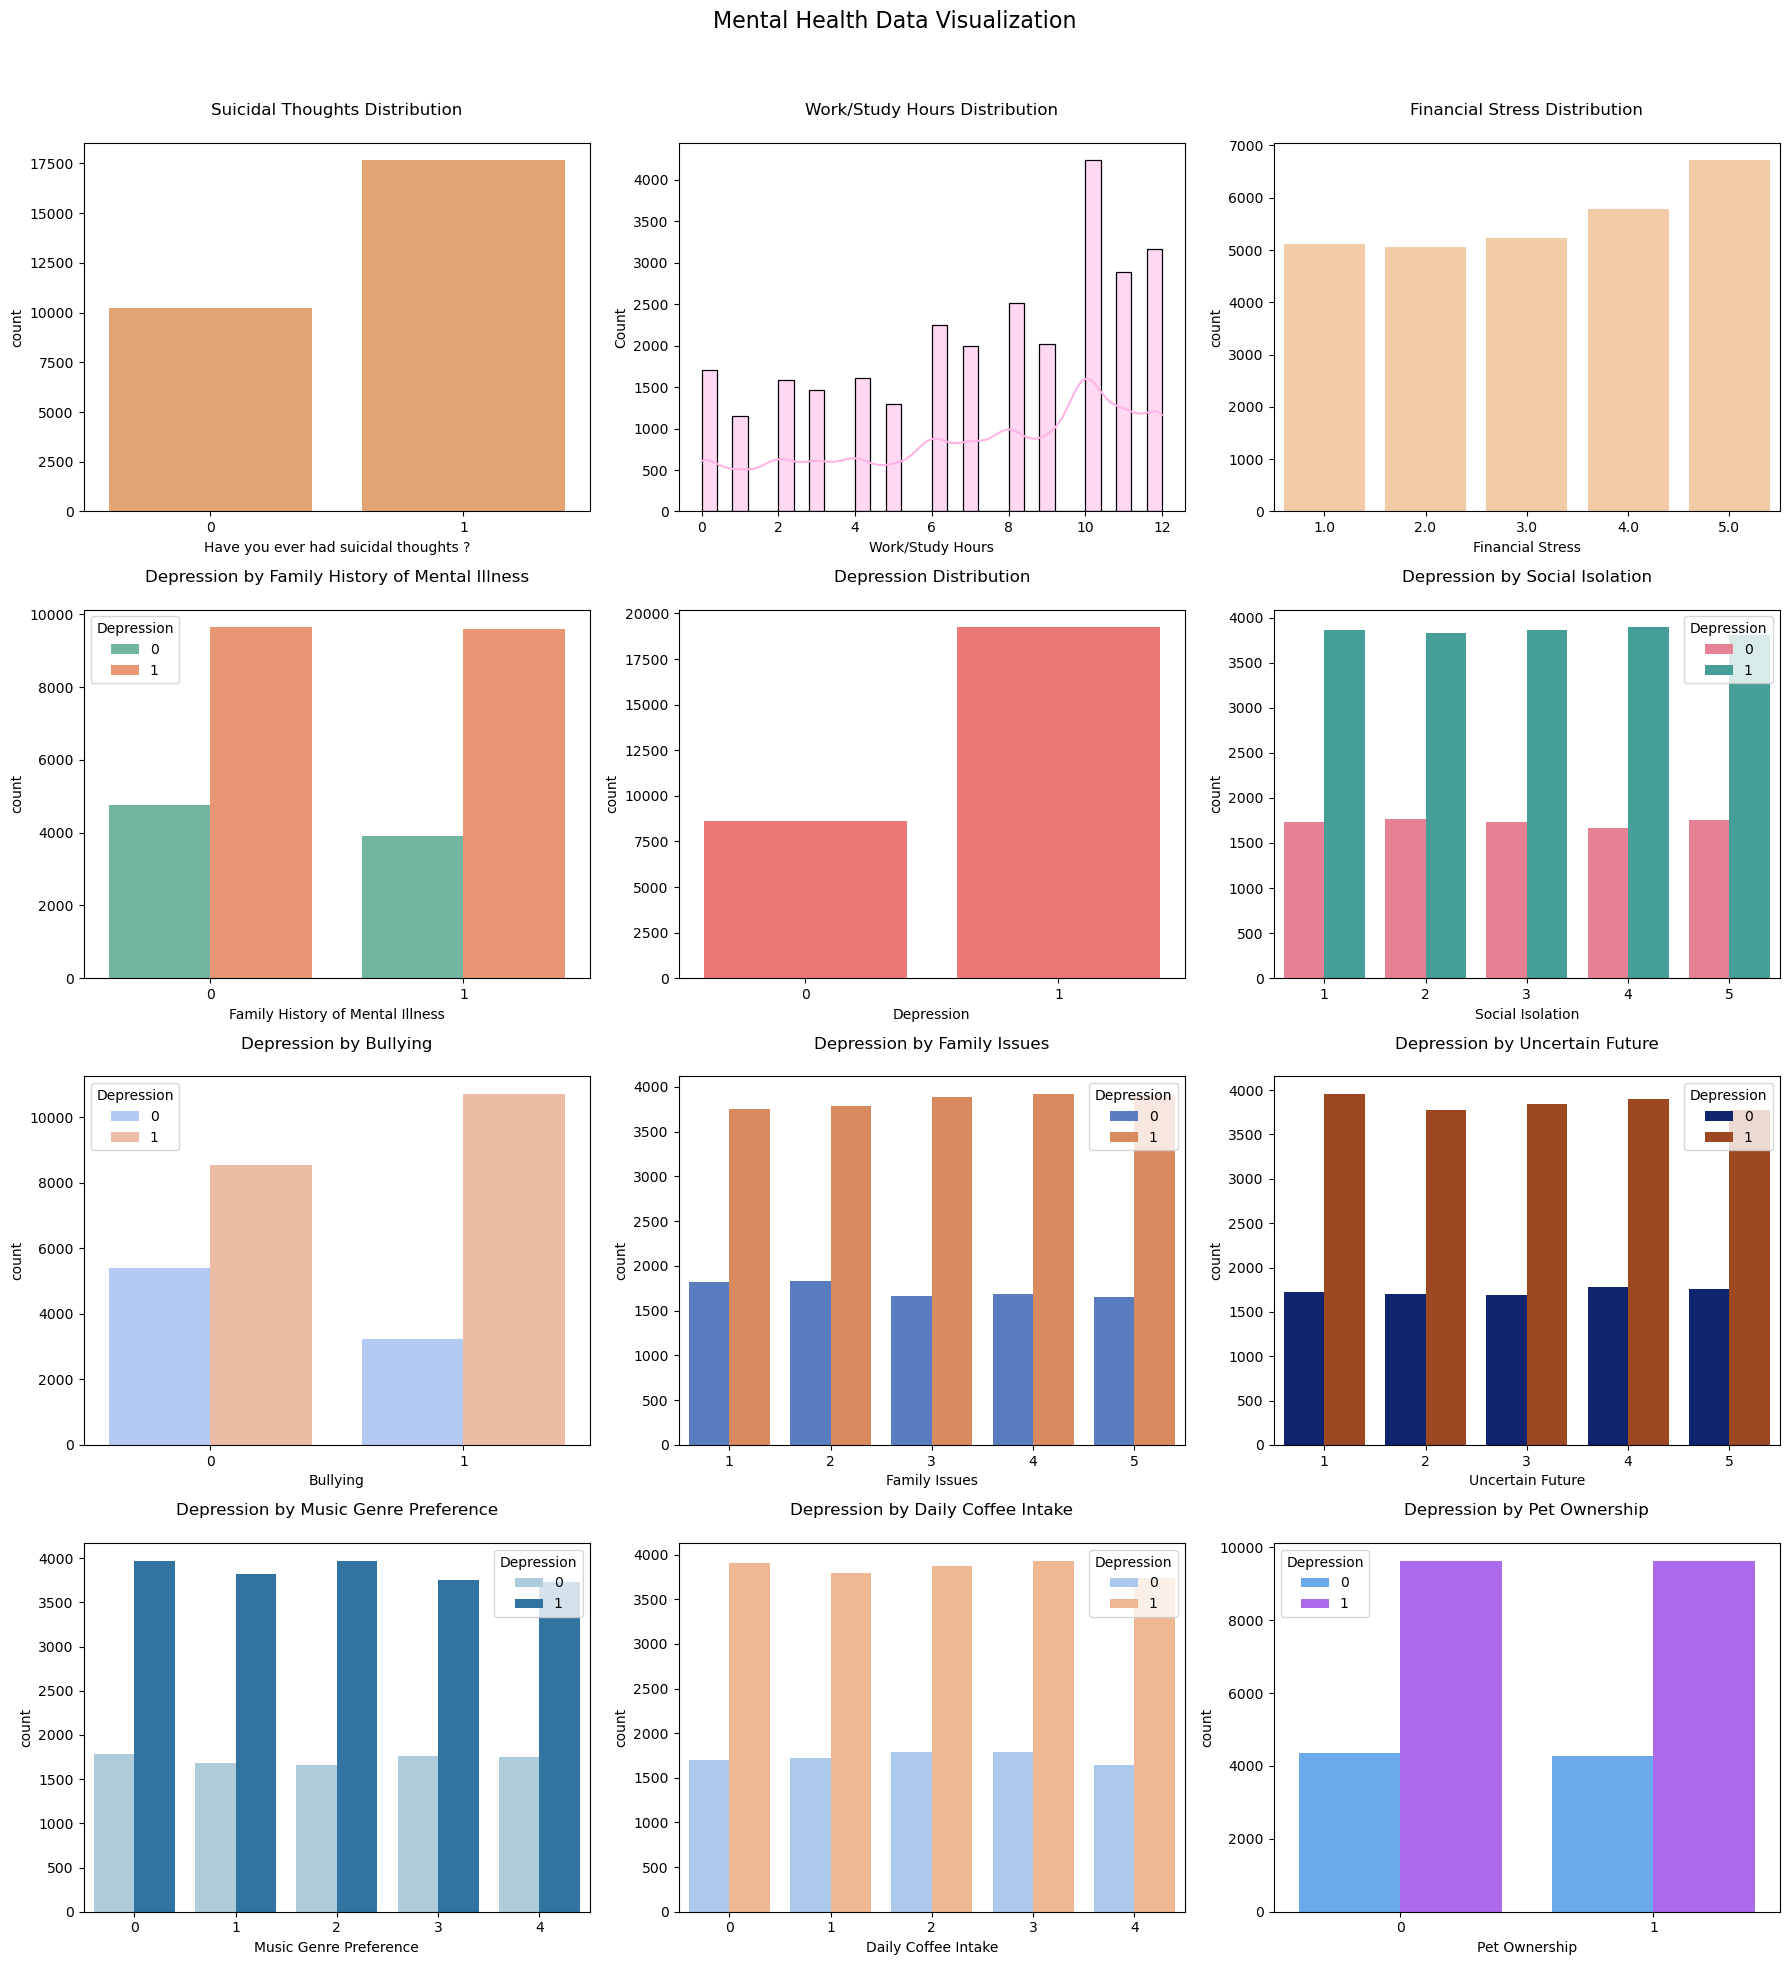

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

# Define a color palette for variety
colors = ["#ff9999", "#66b3ff", "#99ff99", "#ffcc99", "#c2c2f0", "#ffb3e6", "#ff6666", "#c4e17f", "#76d7c4", "#f7c6c7", "#f4a261", "#2a9d8f"]

fig, axes = plt.subplots(4, 3, figsize=(18, 20))
fig.suptitle("Mental Health Data Visualization", fontsize=16)

# Have you ever had suicidal thoughts?
sns.countplot(data=df, x="Have you ever had suicidal thoughts ?", ax=axes[0, 0], color=random.choice(colors))
axes[0, 0].set_title("Suicidal Thoughts Distribution", pad=20)

# Work/Study Hours
sns.histplot(df["Work/Study Hours"], bins=30, kde=True, color=random.choice(colors), ax=axes[0, 1])
axes[0, 1].set_title("Work/Study Hours Distribution", pad=20)

# Financial Stress
sns.countplot(data=df, x="Financial Stress", ax=axes[0, 2], color=random.choice(colors))
axes[0, 2].set_title("Financial Stress Distribution", pad=20)

# Family History of Mental Illness
sns.countplot(data=df, x="Family History of Mental Illness", hue="Depression", ax=axes[1, 0], palette="Set2")
axes[1, 0].set_title("Depression by Family History of Mental Illness", pad=20)

# Depression
sns.countplot(data=df, x="Depression", ax=axes[1, 1], color=random.choice(colors))
axes[1, 1].set_title("Depression Distribution", pad=20)

# Social Isolation
sns.countplot(data=df, x="Social Isolation", hue="Depression", ax=axes[1, 2], palette="husl")
axes[1, 2].set_title("Depression by Social Isolation", pad=20)

# Bullying
sns.countplot(data=df, x="Bullying", hue="Depression", ax=axes[2, 0], palette="coolwarm")
axes[2, 0].set_title("Depression by Bullying", pad=20)

# Family Issues
sns.countplot(data=df, x="Family Issues", hue="Depression", ax=axes[2, 1], palette="muted")
axes[2, 1].set_title("Depression by Family Issues", pad=20)

# Uncertain Future
sns.countplot(data=df, x="Uncertain Future", hue="Depression", ax=axes[2, 2], palette="dark")
axes[2, 2].set_title("Depression by Uncertain Future", pad=20)

# Music Genre Preference
sns.countplot(data=df, x="Music Genre Preference", hue="Depression", ax=axes[3, 0], palette="Paired")
axes[3, 0].set_title("Depression by Music Genre Preference", pad=20)

# Daily Coffee Intake
sns.countplot(data=df, x="Daily Coffee Intake", hue="Depression", ax=axes[3, 1], palette="pastel")
axes[3, 1].set_title("Depression by Daily Coffee Intake", pad=20)

# Dietary Habits values
sns.countplot(data=df, x="Pet Ownership", hue="Depression", ax=axes[3, 2], palette="cool")
axes[3, 2].set_title("Depression by Pet Ownership", pad=20)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
# import plotly.express as px
# import pandas as pd

# # استخدام عينة صغيرة إذا كان عدد الصفوف كبيرًا
# df_sample = df.sample(min(5000, len(df)), random_state=42)

# # توزيع العمر
# fig_age = px.histogram(df_sample, x="age", nbins=30, title="Age Distribution", 
#                        color_discrete_sequence=["skyblue"], marginal="box")

# # توزيع مرض السكري
# df_diabetes_count = df_sample["diabetes"].value_counts().reset_index()
# df_diabetes_count.columns = ["diabetes", "count"]
# fig_diabetes = px.bar(df_diabetes_count, 
#                       x="diabetes", y="count", title="Diabetes Distribution", 
#                       labels={"diabetes": "Diabetes", "count": "Count"},
#                       color="diabetes")

# # توزيع الجنس
# df_gender_count = df_sample["gender"].value_counts().reset_index()
# df_gender_count.columns = ["gender", "count"]
# fig_gender = px.bar(df_gender_count, 
#                     x="gender", y="count", title="Gender Distribution", 
#                     labels={"gender": "Gender", "count": "Count"},
#                     color="gender")

# # مرض السكري حسب الجنس
# fig_diabetes_gender = px.bar(df_sample, x="gender", color="diabetes", title="Diabetes by Gender", 
#                              barmode="group")

# # مرض السكري حسب الفئات العمرية
# df_sample["Age Group"] = pd.cut(df_sample["age"], bins=[50, 60, 70, 80, 90, 100], labels=["50-60", "60-70", "70-80", "80-90", "90+"])
# fig_diabetes_age = px.bar(df_sample, x="Age Group", color="diabetes", title="Diabetes by Age Group", 
#                           barmode="group")

# # عرض الرسوم في المتصفح لتسريع الأداء
# fig_age.show("browser")
# fig_diabetes.show("browser")
# fig_gender.show("browser")
# fig_diabetes_gender.show("browser")
# fig_diabetes_age.show("browser")


In [ ]:
# import plotly.express as px
# import pandas as pd

# # استخدام عينة صغيرة إذا كان عدد الصفوف كبيرًا
# df_sample = df.sample(min(5000, len(df)), random_state=42)

# # توزيع العمر
# fig_age = px.histogram(df_sample, x="age", nbins=30, title="Age Distribution", 
#                        color_discrete_sequence=["skyblue"], marginal="box")

# # توزيع مرض السكري
# df_diabetes_count = df_sample["diabetes"].value_counts().reset_index()
# df_diabetes_count.columns = ["diabetes", "count"]
# fig_diabetes = px.bar(df_diabetes_count, 
#                       x="diabetes", y="count", title="Diabetes Distribution", 
#                       labels={"diabetes": "Diabetes", "count": "Count"},
#                       color="diabetes")

# # توزيع الجنس
# df_gender_count = df_sample["gender"].value_counts().reset_index()
# df_gender_count.columns = ["gender", "count"]
# fig_gender = px.bar(df_gender_count, 
#                     x="gender", y="count", title="Gender Distribution", 
#                     labels={"gender": "Gender", "count": "Count"},
#                     color="gender")

# # مرض السكري حسب الجنس
# fig_diabetes_gender = px.bar(df_sample, x="gender", color="diabetes", title="Diabetes by Gender", 
#                              barmode="group")

# # مرض السكري حسب الفئات العمرية
# df_sample["Age Group"] = pd.cut(df_sample["age"], bins=[50, 60, 70, 80, 90, 100], labels=["50-60", "60-70", "70-80", "80-90", "90+"])
# fig_diabetes_age = px.bar(df_sample, x="Age Group", color="diabetes", title="Diabetes by Age Group", 
#                           barmode="group")

# # عرض الرسوم في المتصفح لتسريع الأداء
# fig_age.show("browser")
# fig_diabetes.show("browser")
# fig_gender.show("browser")
# fig_diabetes_gender.show("browser")
# fig_diabetes_age.show("browser")


In [50]:
# import plotly.express as px
# import pandas as pd

# # توزيع العمر
# fig_age = px.histogram(df, x="age", nbins=30, title="Age Distribution", 
#                        color_discrete_sequence=["skyblue"], marginal="box")

# # توزيع مرض السكري
# df_diabetes_count = df["diabetes"].value_counts().reset_index()
# df_diabetes_count.columns = ["diabetes", "count"]  # إعادة تسمية الأعمدة
# fig_diabetes = px.bar(df_diabetes_count, 
#                       x="diabetes", y="count", title="Diabetes Distribution", 
#                       labels={"diabetes": "Diabetes", "count": "Count"},
#                       color="diabetes", color_discrete_sequence=px.colors.qualitative.Pastel)

# # توزيع الجنس
# df_gender_count = df["gender"].value_counts().reset_index()
# df_gender_count.columns = ["gender", "count"]
# fig_gender = px.bar(df_gender_count, 
#                     x="gender", y="count", title="Gender Distribution", 
#                     labels={"gender": "Gender", "count": "Count"},
#                     color="gender", color_discrete_sequence=px.colors.qualitative.Set2)

# # مرض السكري حسب الجنس
# fig_diabetes_gender = px.bar(df, x="gender", color="diabetes", title="Diabetes by Gender", 
#                              barmode="group", color_discrete_sequence=px.colors.qualitative.Set1)

# # مرض السكري حسب الفئات العمرية
# df["Age Group"] = pd.cut(df["age"], bins=[50, 60, 70, 80, 90, 100], labels=["50-60", "60-70", "70-80", "80-90", "90+"])
# fig_diabetes_age = px.bar(df, x="Age Group", color="diabetes", title="Diabetes by Age Group", 
#                           barmode="group", color_discrete_sequence=px.colors.qualitative.Vivid)

# # مرض السكري حسب الدولة (أكثر 10 دول)
# top_countries = df["Country"].value_counts().nlargest(10).index
# df_filtered = df[df["Country"].isin(top_countries)]
# fig_diabetes_country = px.bar(df_filtered, y="Country", color="diabetes", title="Diabetes by Country (Top 10)", 
#                               barmode="group", orientation="h", color_discrete_sequence=px.colors.qualitative.Safe)

# # مرض السكري حسب مستوى النشاط البدني
# fig_activity = px.bar(df, x="Physical Activity Level", color="diabetes", title="Diabetes by Physical Activity", 
#                       barmode="group", color_discrete_sequence=px.colors.qualitative.Plotly)

# # مرض السكري حسب التاريخ العائلي
# fig_family_history = px.bar(df, x="Family History", color="diabetes", title="Diabetes by Family History", 
#                             barmode="group", color_discrete_sequence=px.colors.qualitative.T10)

# # مرض السكري حسب الوعي الصحي
# fig_awareness = px.bar(df, x="Disease Awareness", color="diabetes", title="Diabetes by Disease Awareness", 
#                        barmode="group", color_discrete_sequence=px.colors.qualitative.Alphabet)

# # مرض السكري حسب حالة التدخين
# fig_smoking = px.bar(df, x="smoking_history", color="diabetes", title="Diabetes by Smoking Status", 
#                      barmode="group", color_discrete_sequence=px.colors.qualitative.Light24)

# # مرض السكري حسب استهلاك السكر
# fig_sugar = px.bar(df, x="eating sugar", color="diabetes", title="Diabetes by Eating Sugar", 
#                    barmode="group", color_discrete_sequence=px.colors.qualitative.Dark24)

# # مرض السكري حسب جودة النوم
# fig_sleep = px.bar(df, x="Sleep Quality", color="diabetes", title="Diabetes by Sleep Quality", 
#                    barmode="group", color_discrete_sequence=px.colors.qualitative.Prism)

# # عرض جميع الرسوم البيانية التفاعلية
# fig_age.show()
# fig_diabetes.show()
# fig_gender.show()
# fig_diabetes_gender.show()
# fig_diabetes_age.show()
# fig_diabetes_country.show()
# fig_activity.show()
# fig_family_history.show()
# fig_awareness.show()
# fig_smoking.show()
# fig_sugar.show()
# fig_sleep.show()



In [ ]:
# import plotly.express as px
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots
# import pandas as pd

# # إنشاء التخطيط الشبكي
# fig = make_subplots(rows=4, cols=3, subplot_titles=[
#     "Age Distribution", "Alzheimer_risk Distribution", "Gender Distribution",
#     "Alzheimer_risk by Gender", "Alzheimer_risk by Age Group", "Alzheimer_risk by Country (Top 10)",
#     "Alzheimer_risk by Physical_Activity", "Alzheimer_risk by Family_History", "Alzheimer_risk by Genetic_Risk_Factor",
#     "Alzheimer_risk by Smoking_Status", "Alzheimer_risk by Stress_Levels", ""])

# # Age Distribution
# hist_fig = px.histogram(df, x="Age", nbins=30, marginal="box", color_discrete_sequence=["skyblue"])
# for trace in hist_fig.data:
#     fig.add_trace(trace, row=1, col=1)

# # Alzheimer_risk Distribution
# count_fig = px.histogram(df, x="Alzheimer_risk", color_discrete_sequence=["blue"])
# for trace in count_fig.data:
#     fig.add_trace(trace, row=1, col=2)

# # Gender Distribution
# gender_fig = px.histogram(df, x="Gender", color_discrete_sequence=["green"])
# for trace in gender_fig.data:
#     fig.add_trace(trace, row=1, col=3)

# # Alzheimer_risk by Gender
# risk_gender_fig = px.histogram(df, x="Gender", color="Alzheimer_risk", barmode="group")
# for trace in risk_gender_fig.data:
#     fig.add_trace(trace, row=2, col=1)

# # Alzheimer_risk by Age Group
# df["Age Group"] = pd.cut(df["Age"], bins=[50, 60, 70, 80, 90, 100], labels=["50-60", "60-70", "70-80", "80-90", "90+"])
# age_group_fig = px.histogram(df, x="Age Group", color="Alzheimer_risk", barmode="group")
# for trace in age_group_fig.data:
#     fig.add_trace(trace, row=2, col=2)

# # Alzheimer_risk by Country (Top 10)
# top_countries = df["Country"].value_counts().nlargest(10).index
# df_filtered = df[df["Country"].isin(top_countries)]
# country_fig = px.histogram(df_filtered, y="Country", color="Alzheimer_risk", barmode="group")
# for trace in country_fig.data:
#     fig.add_trace(trace, row=2, col=3)

# # Alzheimer_risk by Physical_Activity
# activity_fig = px.histogram(df, x="Physical_Activity_Level", color="Alzheimer_risk", barmode="group")
# for trace in activity_fig.data:
#     fig.add_trace(trace, row=3, col=1)

# # Alzheimer_risk by Family_History
# family_fig = px.histogram(df, x="Family_History_of_Alzheimer", color="Alzheimer_risk", barmode="group")
# for trace in family_fig.data:
#     fig.add_trace(trace, row=3, col=2)

# # Alzheimer_risk by Genetic_Risk_Factor (if exists)
# if "Genetic_Risk_Factor" in df.columns:
#     genetic_fig = px.histogram(df, x="Genetic_Risk_Factor", color="Alzheimer_risk", barmode="group")
#     for trace in genetic_fig.data:
#         fig.add_trace(trace, row=3, col=3)

# # Alzheimer_risk by Smoking_Status
# smoking_fig = px.histogram(df, x="Smoking_Status", color="Alzheimer_risk", barmode="group")
# for trace in smoking_fig.data:
#     fig.add_trace(trace, row=4, col=1)

# # Alzheimer_risk by Stress_Levels
# stress_fig = px.histogram(df, x="Stress_Levels", color="Alzheimer_risk", barmode="group")
# for trace in stress_fig.data:
#     fig.add_trace(trace, row=4, col=2)

# # تخصيص الشكل النهائي
# fig.update_layout(title_text="Alzheimer’s Data Visualization", height=1000, showlegend=False)
# fig.show()


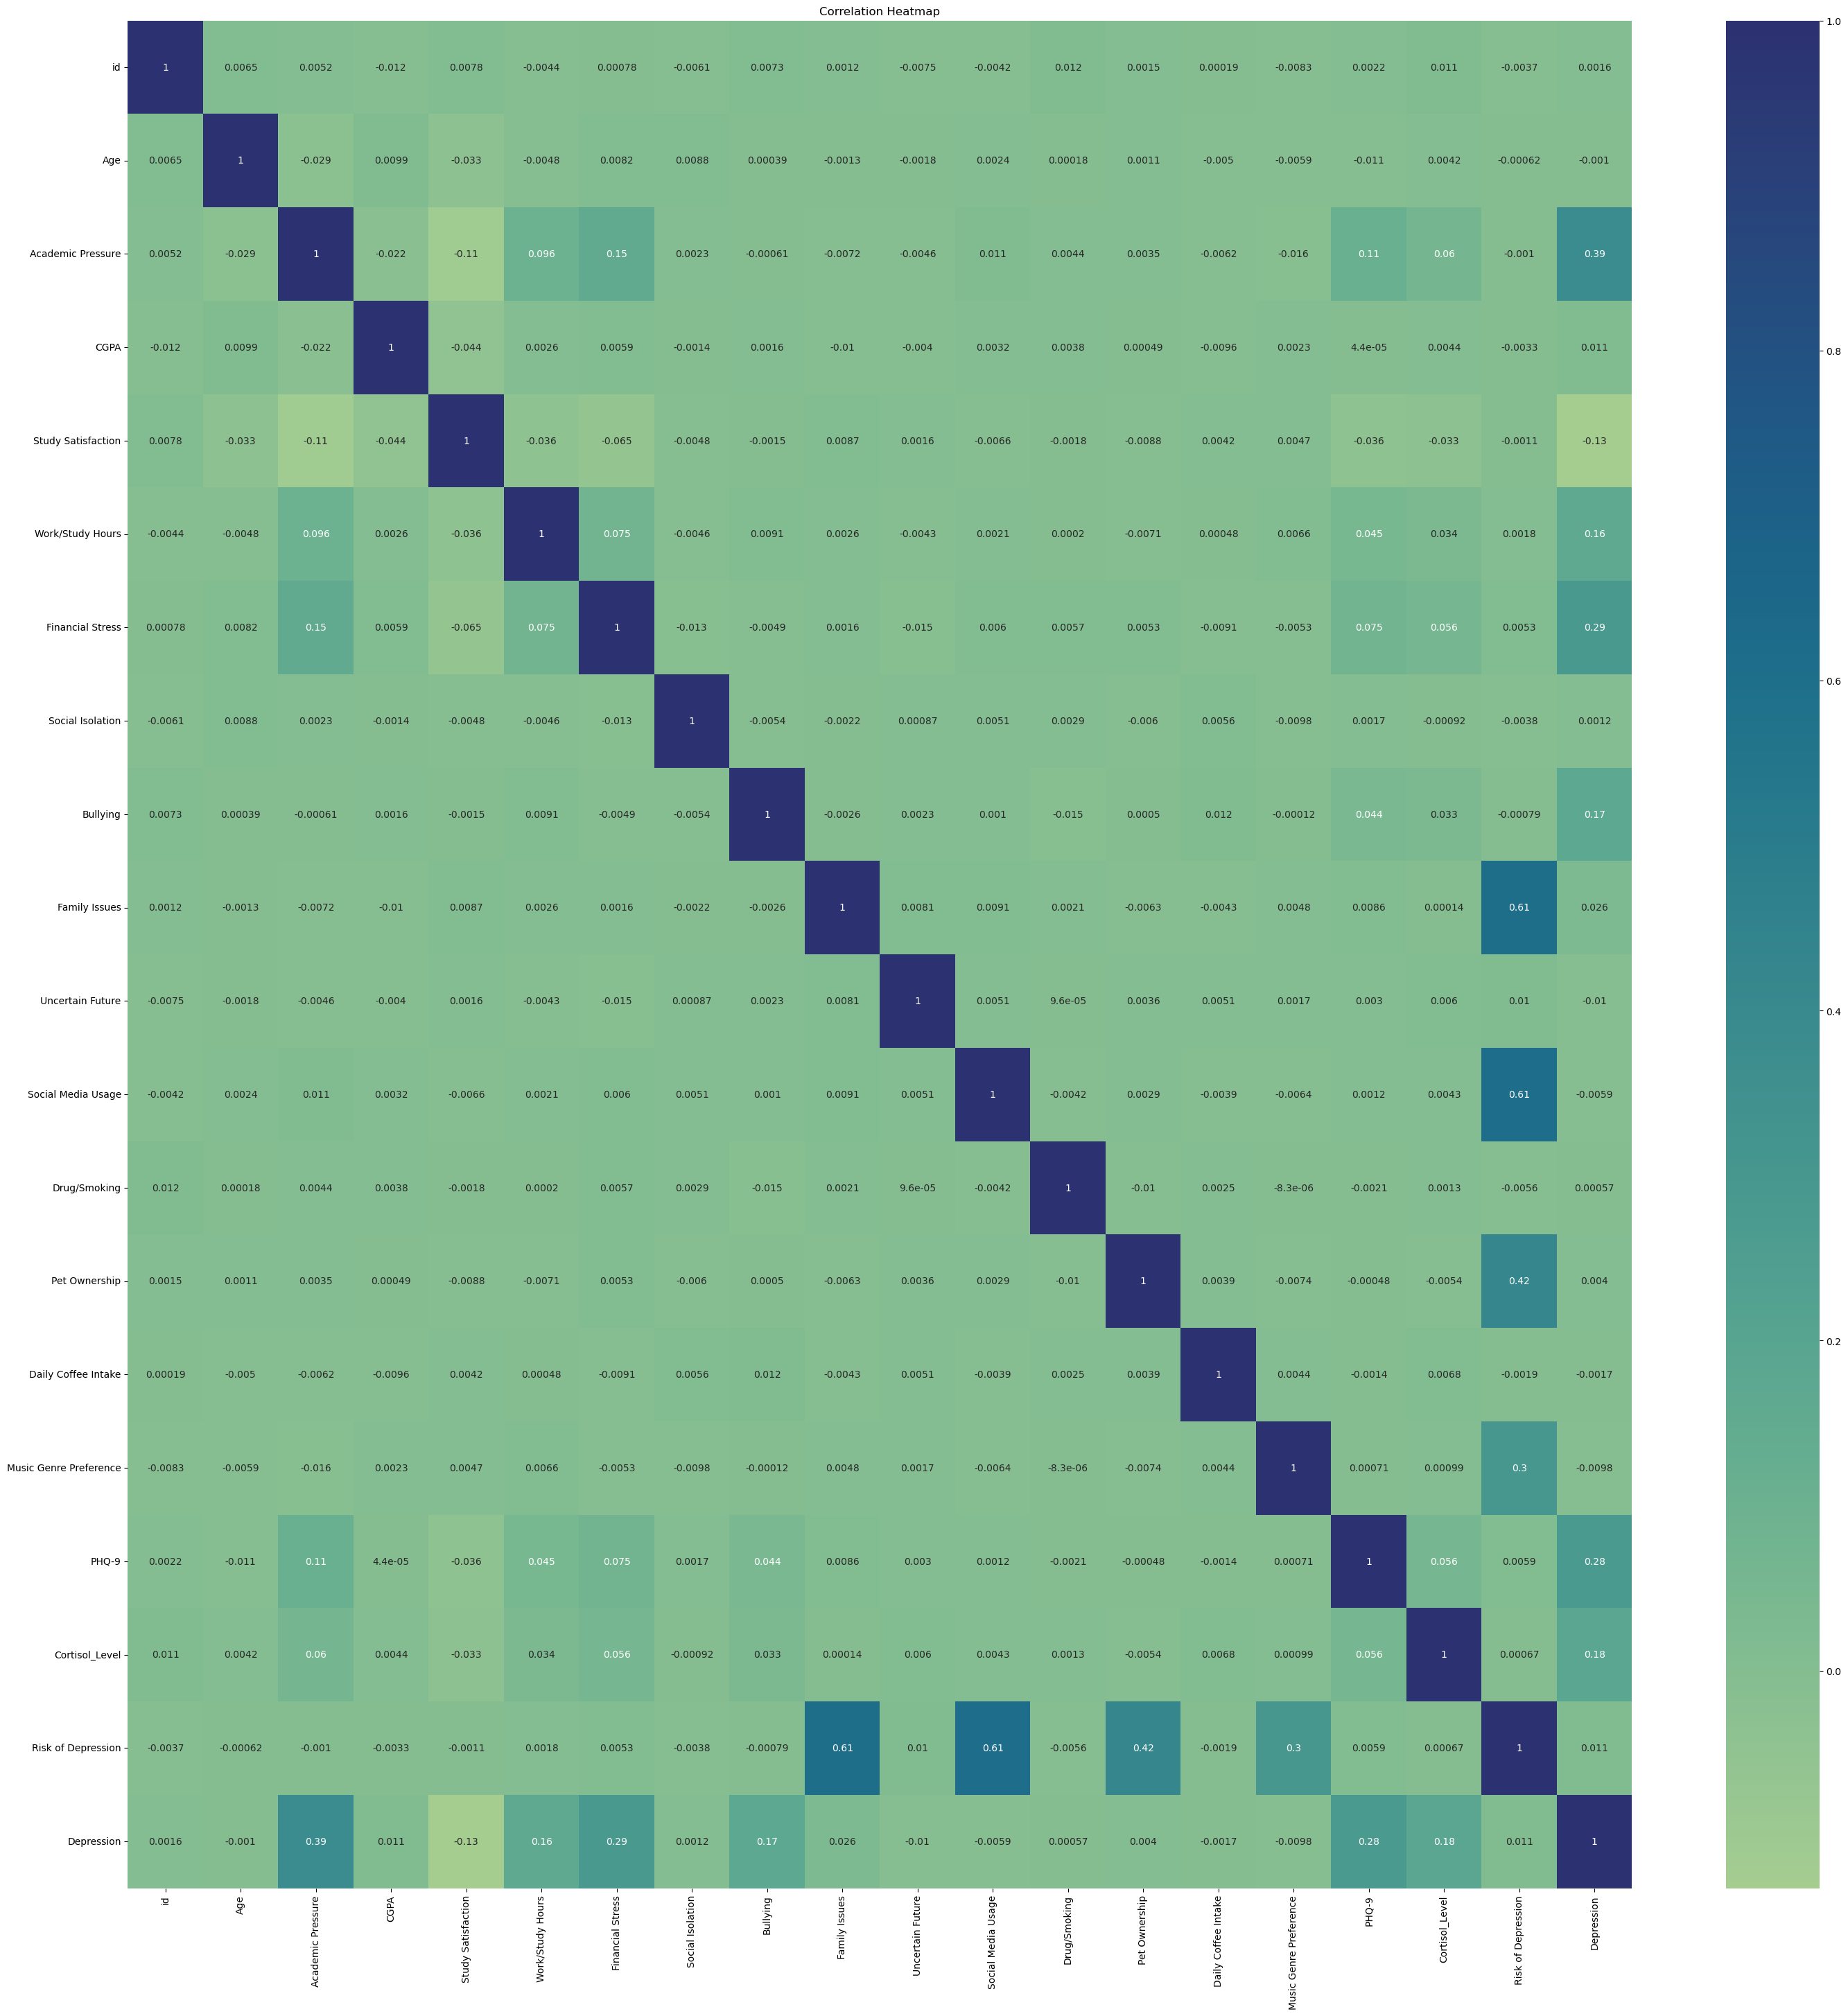

In [22]:
#heat map
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
corr_matrix = df[numeric_columns].corr()
plt.figure(figsize=(35,35))
sns.heatmap(corr_matrix, annot=True, cmap='crest')
plt.title('Correlation Heatmap')
plt.show()


In [51]:
correlation_matrix = df.corr()
target_correlation = correlation_matrix['Depression']
print(target_correlation)


Gender                                  -0.001328
Age                                     -0.001012
City                                    -0.020997
Academic Pressure                        0.385063
CGPA                                     0.010543
Study Satisfaction                      -0.131795
Sleep Duration                          -0.014582
Dietary Habits                           0.165237
Degree                                  -0.001647
Have you ever had suicidal thoughts ?    0.435514
Work/Study Hours                         0.162389
Financial Stress                         0.286147
Family History of Mental Illness         0.044146
Social Isolation                         0.001239
Bullying                                 0.169139
Family Issues                            0.026149
Uncertain Future                        -0.010122
Social Media Usage                      -0.005881
Drug/Smoking                             0.000566
Favorite Color                          -0.004426


In [52]:
df.drop(['id'],axis=1,inplace=True)
df

KeyError: "['id'] not found in axis"

In [53]:
df.columns

Index(['Gender', 'Age', 'City', 'Academic Pressure', 'CGPA',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness',
       'Social Isolation', 'Bullying', 'Family Issues', 'Uncertain Future',
       'Social Media Usage', 'Drug/Smoking', 'Favorite Color', 'Pet Ownership',
       'Daily Coffee Intake', 'Music Genre Preference', 'PHQ-9',
       'Cortisol_Level', 'Depression'],
      dtype='object')

In [199]:
def calculate_outlier_percentage(df):
    outlier_data = []

    for column in df.select_dtypes(include=[np.number]): 
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_percentage = (len(outliers) / len(df)) * 100

        outlier_data.append([column, round(outlier_percentage, 2)])

    return pd.DataFrame(outlier_data, columns=['Feature', 'Outlier Percentage'])

outlier_df = calculate_outlier_percentage(df)
print(outlier_df)

                                  Feature  Outlier Percentage
0                                  Gender                0.00
1                                     Age                0.00
2                                    City                0.00
3                       Academic Pressure                0.00
4                                    CGPA                0.03
5                      Study Satisfaction                0.00
6                          Sleep Duration                0.06
7                          Dietary Habits                0.00
8                                  Degree                0.00
9   Have you ever had suicidal thoughts ?                0.00
10                       Work/Study Hours                0.00
11                       Financial Stress                0.00
12       Family History of Mental Illness                0.00
13                       Social Isolation                0.00
14                               Bullying                0.00
15      

In [54]:
df["Depression"].value_counts(normalize=True) * 100


Depression
1    69.004947
0    30.995053
Name: proportion, dtype: float64

In [55]:
X = df.drop(columns=['Depression'])  
y = df['Depression'] 

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [57]:
from imblearn.combine import SMOTEENN
X= df.drop(['Depression'], axis = 1)
y= df['Depression']

smote_enn = SMOTEENN(random_state = 42, n_jobs = -1)
X_smote, y_smote = smote_enn.fit_resample(X,y)

print(f'Resampled dataset shape: {y_smote.value_counts(normalize = True)}')

data_2 = pd.concat([X_smote, y_smote],axis=1)

c:\Users\arwah\anaconda3\Lib\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Resampled dataset shape: Depression
0    0.643429
1    0.356571
Name: proportion, dtype: float64


In [58]:
X_train,X_test,y_train,y_test=train_test_split(X_smote,y_smote,test_size=0.30,random_state=1)

Complete LogisticRegression Training Accuracy: 0.931835249263474
Complete LogisticRegression Test Accuracy: 0.9299096913330638
Confusion Matrix:
 [[4472  323]
 [ 197 2427]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.95      4795
           1       0.88      0.92      0.90      2624

    accuracy                           0.93      7419
   macro avg       0.92      0.93      0.92      7419
weighted avg       0.93      0.93      0.93      7419



c:\Users\arwah\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


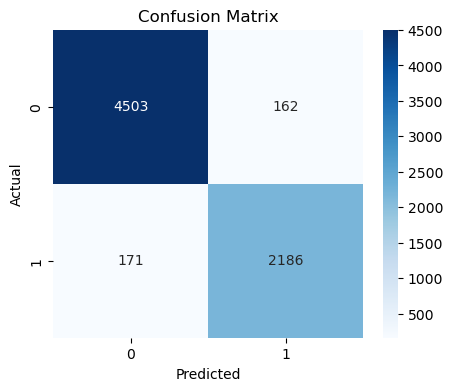

In [59]:
#first model "LogisticRegression" with Smote and Class Weigh

model= LogisticRegression(class_weight='balanced', random_state=1)
model.fit(X_train, y_train)


# logisticRegression
logR_predict = model.predict(X_test)

# accuracy
Tr_score = model.score(X_train, y_train)
Tst_score = model.score(X_test, y_test)

print("Complete LogisticRegression Training Accuracy:", Tr_score)
print("Complete LogisticRegression Test Accuracy:", Tst_score)
print("Confusion Matrix:\n", confusion_matrix(y_test, logR_predict))
print("\nClassification Report:\n", classification_report(y_test, logR_predict))

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

X_train shape: (17311, 25)
Complete LogisticRegression Training ! 0.9417133614464791
Complete LogisticRegression Test! 0.9436581749561935
Accuracy: 0.9437
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96      4795
           1       0.93      0.91      0.92      2624

    accuracy                           0.94      7419
   macro avg       0.94      0.94      0.94      7419
weighted avg       0.94      0.94      0.94      7419



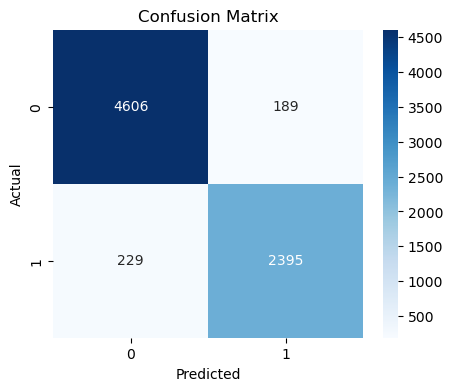

In [60]:
#first model "LogisticRegression"    veryyyyy gooooood
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=25)  

X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

print("X_train shape:", X_train.shape)

model = LogisticRegression(C=7, solver='liblinear')
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
Tr_score=model.score(X_train_selected,y_train)
Tst_score=model.score(X_test_selected,y_test)

print("Complete LogisticRegression Training !",Tr_score)
print("Complete LogisticRegression Test!",Tst_score)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", class_report)


plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



In [263]:
print("X_train_selected shape:", X_train_selected.shape)  # يجب أن يكون (?, 25)
print("X_test_selected shape:", X_test_selected.shape)    # يجب أن يكون (?, 25)
print("Model Coefficients Shape:", model.coef_.shape)    # يجب أن يكون (1, 25)


X_train_selected shape: (17311, 25)
X_test_selected shape: (7419, 25)
Model Coefficients Shape: (1, 25)


c:\Users\arwah\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\arwah\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

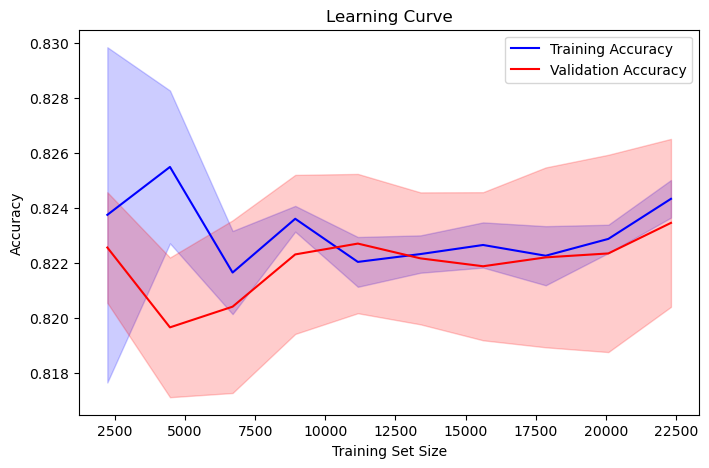

In [267]:
train_sizes, train_scores, test_scores = learning_curve(LogisticRegression(), 
                                                        X, y, cv=5, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10), 
                                                        scoring="accuracy")


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label="Training Accuracy", color="blue")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")

plt.plot(train_sizes, test_mean, label="Validation Accuracy", color="red")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color="red")

plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.show()


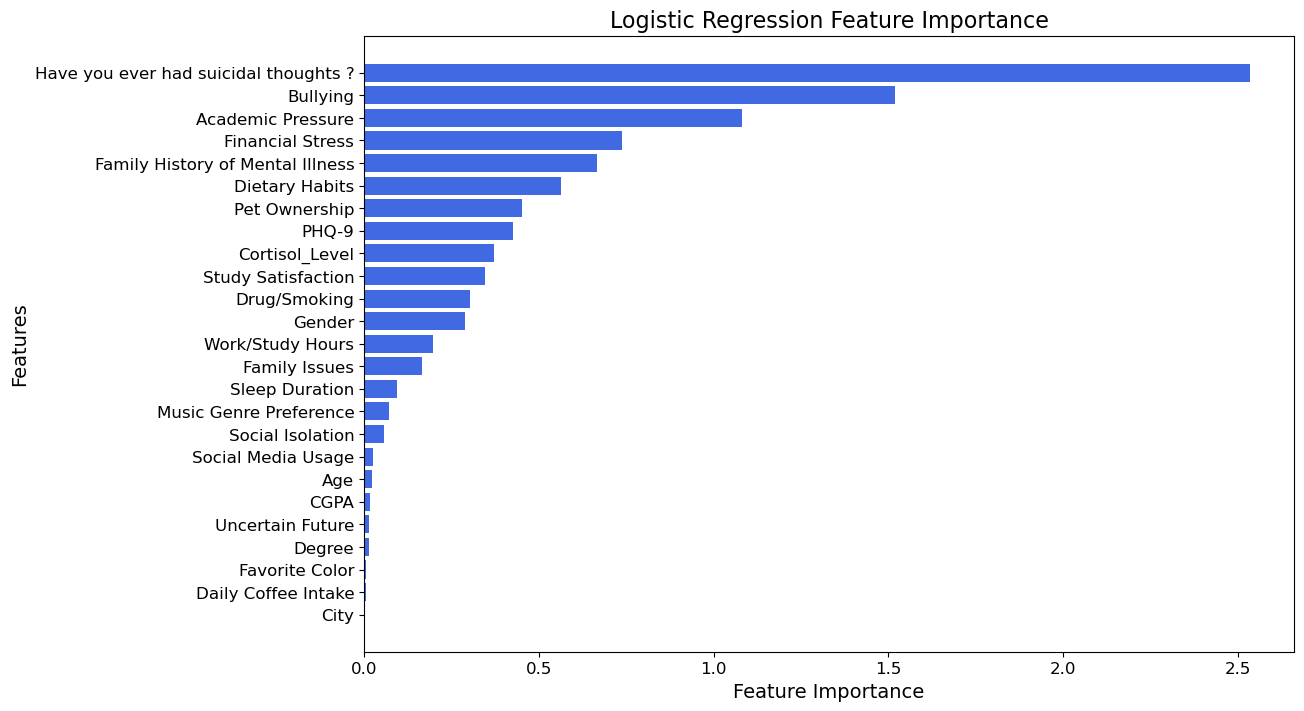

In [61]:
# Feature Importance
feature_importance = np.abs(model.coef_[0])  
feature_names = X_train.columns[selector.get_support()]  
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="royalblue")
plt.xlabel("Feature Importance", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.title("Logistic Regression Feature Importance", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().invert_yaxis() 
plt.show()



In [36]:
#second model XGB without any improvements


model2 = XGBClassifier(scale_pos_weight=1.5, 
                       max_depth=4,  
                       learning_rate=0.05,  
                       n_estimators=300,  
                       subsample=0.8,  
                       colsample_bytree=0.8,
                       gamma=2,
                       random_state=42) 
model2.fit(X_train, y_train)
train_accuracy = accuracy_score(y_train, model2.predict(X_train))
test_accuracy = accuracy_score(y_test, model2.predict(X_test))

# accuracy
y_pred_xgb = model2.predict(X_test)

print("XGB Training Accuracy:", train_accuracy)
print("XGB Test Accuracy:", test_accuracy)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


XGB Training Accuracy: 0.9803466796875
XGB Test Accuracy: 0.9685274850469952
XGBoost Accuracy: 0.9685274850469952
Confusion Matrix:
 [[4561  104]
 [ 117 2240]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      4665
           1       0.96      0.95      0.95      2357

    accuracy                           0.97      7022
   macro avg       0.97      0.96      0.96      7022
weighted avg       0.97      0.97      0.97      7022



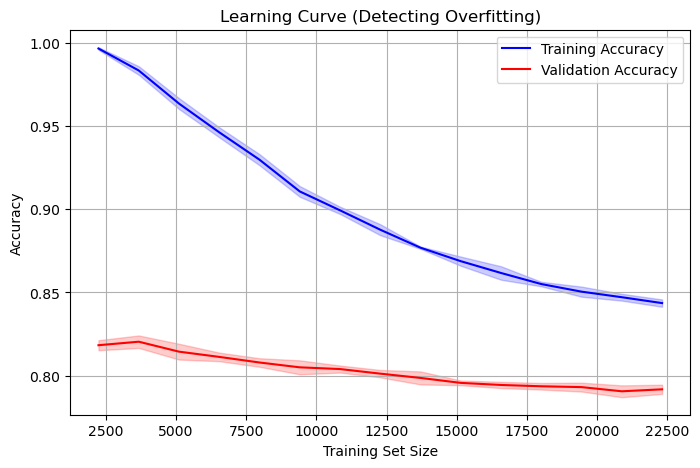

In [269]:
from xgboost import XGBClassifier
from sklearn.model_selection import learning_curve, StratifiedKFold
import numpy as np
import matplotlib.pyplot as plt


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


model2 = XGBClassifier(scale_pos_weight=15, reg_lambda=7, random_state=42)

# حساب learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model2, X, y, cv=cv, train_sizes=np.linspace(0.1, 1.0, 15), scoring="accuracy", n_jobs=-1
)

# حساب المتوسط والانحراف المعياري
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# رسم المنحنى
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label="Training Accuracy", color="blue")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")

plt.plot(train_sizes, test_mean, label="Validation Accuracy", color="red")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color="red")

plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve (Detecting Overfitting)")
plt.legend()
plt.grid(True)
plt.show()



In [121]:
# #second model XGB with grid parameters & smote & alot of improvements
# from sklearn.model_selection import RandomizedSearchCV

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


# param_dist = {
#     'n_estimators': [100],
#     'max_depth': [1,2],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'gamma': [0, 0.1, 0.2, 0.3],  
#     'subsample': [0.9, 0.8, 1],  
#     'colsample_bytree': [0.7, 0.8],  
#     'min_child_weight': [1, 2, 3],  
#     'scale_pos_weight': [1, len(y_train[y_train == 0]) / len(y_train[y_train == 1])]
# }

# xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
# random_search = RandomizedSearchCV(xgb, param_dist, cv=5, scoring='accuracy', n_jobs=-1, n_iter=10, random_state=42)
# random_search.fit(X_train_resampled, y_train_resampled)

# # أفضل معلمات
# best_xgb = random_search.best_estimator_

# # التقييم على مجموعة الاختبار
# y_pred = best_xgb.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# conf_matrix = confusion_matrix(y_test, y_pred)
# class_report = classification_report(y_test, y_pred)

# # print("XGB Training Accuracy:", train_accuracy)
# # print("XGB Test Accuracy:", test_accuracy)
# print(f"XGBoost Accuracy: {accuracy}")
# print("Confusion Matrix:")
# print(conf_matrix)
# print("Classification Report:")
# print(class_report)


In [133]:
# import matplotlib.pyplot as plt
# import xgboost as xgb

# # الحصول على أهمية الميزات
# feature_importance = model2.feature_importances_

# # ترتيب الميزات حسب الأهمية
# sorted_idx = feature_importance.argsort()
# plt.figure(figsize=(10, 6))
# plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align="center")
# plt.yticks(range(len(sorted_idx)), [X_train.columns[i] for i in sorted_idx])
# plt.xlabel("Feature Importance")
# plt.ylabel("Features")
# plt.title("XGBoost Feature Importance")
# plt.show()


In [134]:
# # استخراج أهمية الميزات من نموذج XGBoost
# importances = best_xgb.feature_importances_

# # إنشاء DataFrame لعرض الميزات وأهميتها
# feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# # تحديد الميزات ذات الأهمية المنخفضة جدًا
# low_importance_features = feature_importance_df[feature_importance_df["Importance"] < 0.01]["Feature"].tolist()

# print(f"Features to drop: {low_importance_features}")


In [135]:
# df.drop(['Work Pressure'],axis=1,inplace=True)


In [144]:
#third model Balanced Random Forest Classifier without improvements

model3= BalancedRandomForestClassifier(n_estimators=500,max_depth=7,class_weight='balanced_subsample',min_samples_split=15, min_samples_leaf=6,random_state=42)
model3.fit(X_train, y_train)
y_pred_rf = model3.predict(X_test)
print("Balanced Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Balanced Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print(f"rf Accuracy: {accuracy}")
print("rf Training Accuracy:", train_accuracy)
print("rf Test Accuracy:", test_accuracy)


c:\Users\arwah\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\arwah\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\arwah\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


Balanced Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      4795
           1       0.93      0.96      0.95      2624

    accuracy                           0.96      7419
   macro avg       0.96      0.96      0.96      7419
weighted avg       0.96      0.96      0.96      7419

Balanced Random Forest Confusion Matrix:
[[4615  180]
 [  97 2527]]
rf Accuracy: 0.9392101361369457
rf Training Accuracy: 0.9831898792675178
rf Test Accuracy: 0.9726378218088692


In [ ]:
# model3= BalancedRandomForestClassifier()


# train_sizes, train_scores, test_scores = learning_curve(
#     model3, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring="accuracy"
# )


# train_mean = np.mean(train_scores, axis=1)
# train_std = np.std(train_scores, axis=1)
# test_mean = np.mean(test_scores, axis=1)
# test_std = np.std(test_scores, axis=1)


# plt.figure(figsize=(8, 5))
# plt.plot(train_sizes, train_mean, label="Training Accuracy", color="blue")
# plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")

# plt.plot(train_sizes, test_mean, label="Validation Accuracy", color="red")
# plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color="red")

# plt.xlabel("Training Set Size")
# plt.ylabel("Accuracy")
# plt.title("Learning Curve (Detecting Overfitting)")
# plt.legend()
# plt.show()

In [ ]:

# importances = model3.feature_importances_
# indices = np.argsort(importances)[::-1]

# plt.figure(figsize=(12, 6))
# plt.title("Feature Importance - Balanced Random Forest")
# plt.bar(range(X_train.shape[1]), importances[indices], align="center")
# plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
# plt.xlabel("Features")
# plt.ylabel("Importance Score")
# plt.show()


In [ ]:
# model3= BalancedRandomForestClassifier()


# train_sizes, train_scores, test_scores = learning_curve(
#     model3, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring="accuracy"
# )


# train_mean = np.mean(train_scores, axis=1)
# train_std = np.std(train_scores, axis=1)
# test_mean = np.mean(test_scores, axis=1)
# test_std = np.std(test_scores, axis=1)


# plt.figure(figsize=(8, 5))
# plt.plot(train_sizes, train_mean, label="Training Accuracy", color="blue")
# plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")

# plt.plot(train_sizes, test_mean, label="Validation Accuracy", color="red")
# plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color="red")

# plt.xlabel("Training Set Size")
# plt.ylabel("Accuracy")
# plt.title("Learning Curve (Detecting Overfitting)")
# plt.legend()
# plt.show()

In [ ]:


# X = df.drop('diabetes', axis=1)
# y = df['diabetes']


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# adasyn = ADASYN(sampling_strategy=1.0, random_state=42)  # زيادة العينات بمعدل متوازن
# X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)
# rf = BalancedRandomForestClassifier(n_estimators=300, max_depth=10, random_state=42)
# rf.fit(X_train_resampled, y_train_resampled)


# y_pred_rf = rf.predict(X_test)
# print("Balanced Random Forest Classification Report:")
# print(classification_report(y_test, y_pred_rf))
# print("Balanced Random Forest Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred_rf))
# print(f"rf Accuracy: {accuracy}")
# print("rf Training Accuracy:", train_accuracy)
# print("rf Test Accuracy:", test_accuracy)




In [191]:

rus = RandomUnderSampler(random_state=1)
Xtrain_res, Ytrain_res = rus.fit_resample(X_train, y_train)


rf = RandomForestClassifier(
    class_weight={0: 1, 1: 1.5}, 
    random_state=1, 
    n_estimators=50,  
    max_depth=3,   
    min_samples_split=4,  
    min_samples_leaf=2  
)
rf.fit(Xtrain_res, Ytrain_res)
rf_predict = rf.predict(X_test)


rf_train_acc = rf.score(Xtrain_res, Ytrain_res)
rf_test_acc = accuracy_score(y_test, rf_predict)


print("Random Forest Training Accuracy:", rf_train_acc)
print("Random Forest Test Accuracy:", rf_test_acc)
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_predict))
print("Classification Report:\n", classification_report(y_test, rf_predict))
print(f"rf Accuracy: {accuracy}")




Random Forest Training Accuracy: 0.9140749601275917
Random Forest Test Accuracy: 0.8886392811296534
Confusion Matrix:
 [[3567  621]
 [  73 1971]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.85      0.91      4188
           1       0.76      0.96      0.85      2044

    accuracy                           0.89      6232
   macro avg       0.87      0.91      0.88      6232
weighted avg       0.91      0.89      0.89      6232

rf Accuracy: 0.938222079589217


In [192]:
from lightgbm import LGBMClassifier
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
lgb_model = LGBMClassifier(
    num_leaves=31,  
    min_child_samples=45,  
    learning_rate=0.02,  
    n_estimators=800,  
    colsample_bytree=0.8,  
    subsample=0.75,  
    bagging_fraction=0.7,  
    bagging_freq=5,  
    min_child_weight=4,
    lambda_l1=1,  
    max_bin=255,
    scale_pos_weight=scale_pos_weight,  
    random_state=42
)


lgb_model.fit(X_train, y_train)
lgb_predict = lgb_model.predict(X_test)


lgb_test_acc = accuracy_score(y_test, lgb_predict)
lgb_cv_mean = cross_val_score(lgb_model, X_train, y_train, cv=5, scoring='accuracy').mean()


print(f"GBM Accuracy: {accuracy}")
print("Confusion Matrix:\n", confusion_matrix(y_test, lgb_predict))
print(f"LightGBM CV Mean Accuracy: {lgb_cv_mean:.4f}")
print("Classification Report:\n", classification_report(y_test, lgb_predict))
print("GBM Training Accuracy:", train_accuracy)
print(f"LightGBM Test Accuracy: {lgb_test_acc:.4f}")




[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.75 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.75 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Info] Number of positive: 5016, number of negative: 9525
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002234 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can se

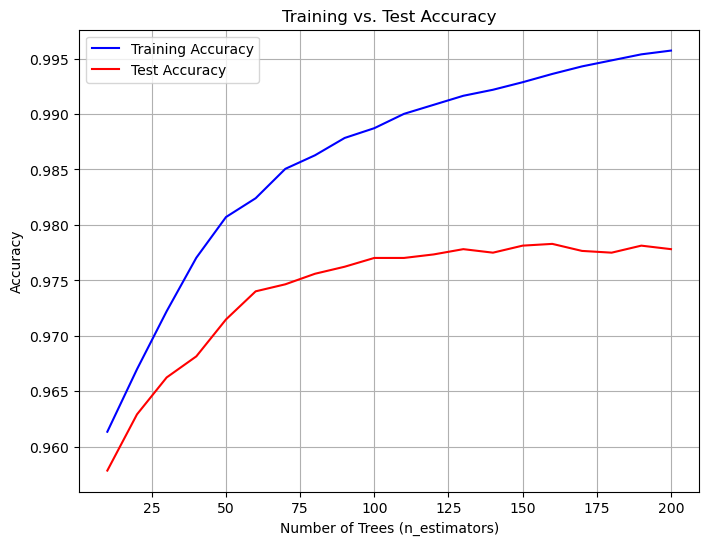

In [138]:
n_estimators = np.arange(10, 210, 10)
train_accuracies = []
test_accuracies = []
for n in n_estimators:
    model = lgb.LGBMClassifier(n_estimators=n, class_weight='balanced', random_state=1, max_depth=5,reg_alpha=0.1,     # L1 Regularization
    reg_lambda=0.1)
    model.fit(X_train, y_train)
    
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)


plt.figure(figsize=(8, 6))
plt.plot(n_estimators, train_accuracies, label="Training Accuracy", color="blue")
plt.plot(n_estimators, test_accuracies, label="Test Accuracy", color="red")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.title("Training vs. Test Accuracy")
plt.legend()
plt.grid(True)
plt.show()


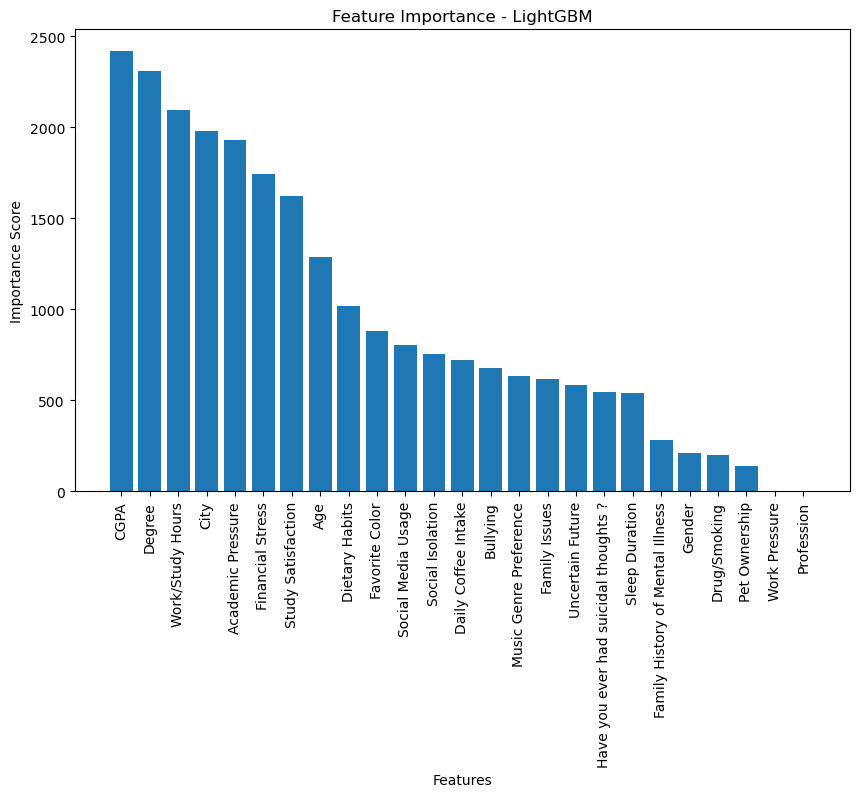

In [193]:
import matplotlib.pyplot as plt
import numpy as np

# استخراج الأهمية
importance = lgb_model.feature_importances_
features = X_train.columns

# ترتيب الأهمية تنازليًا
indices = np.argsort(importance)[::-1]

# رسم الأهمية
plt.figure(figsize=(10, 6))
plt.title("Feature Importance - LightGBM")
plt.bar(range(len(features)), importance[indices], align="center")
plt.xticks(range(len(features)), features[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

In [140]:
# df.drop(["Profession"],axis=1,inplace=True)

In [ ]:
# import pandas as pd
# import numpy as np
# import lightgbm as lgb
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve
# from imblearn.over_sampling import SMOTE

# # 🔹 تحميل البيانات
# m = df.drop('diabetes', axis=1)
# n = df['diabetes']

# # 🔹 تقسيم البيانات إلى تدريب واختبار
# Xtrain, Xtest, Ytrain, Ytest = train_test_split(m, n, test_size=0.30, random_state=1)

# # 🔹 تطبيق SMOTE لموازنة الفئات
# sm = SMOTE(random_state=1)
# Xtrain_res, Ytrain_res = sm.fit_resample(Xtrain, Ytrain)

# # 🔹 ضبط scale_pos_weight لحل مشكلة عدم التوازن
# scale_pos_weight = len(Ytrain[Ytrain == 0]) / len(Ytrain[Ytrain == 1])

# # 🔹 إنشاء نموذج LightGBM مع المعلمات المحسنة
# lgb_model = lgb.LGBMClassifier(
#     scale_pos_weight=scale_pos_weight,  # موازنة الفئات
#     random_state=1,
#     n_estimators=200,  # عدد الأشجار
#     max_depth=7,  # تقليل التعقيد
#     learning_rate=0.05,  # معدل التعلم
#     num_leaves=31,  # تعديل عدد الأوراق
#     min_child_samples=50  # الحد الأدنى من العينات لكل ورقة
# )

# # 🔹 تدريب النموذج
# lgb_model.fit(Xtrain_res, Ytrain_res)

# # 🔹 التنبؤ باحتمالات الفئة 1
# y_probs = lgb_model.predict_proba(Xtest)[:, 1]

# # 🔹 تحديد العتبة المثلى باستخدام AUC-ROC
# fpr, tpr, thresholds = roc_curve(Ytest, y_probs)
# optimal_idx = np.argmax(tpr - fpr)  # إيجاد أفضل نقطة توازن
# optimal_threshold = thresholds[optimal_idx]

# print(f"🔹 Optimal Threshold Found: {optimal_threshold:.3f}")

# # 🔹 ضبط التنبؤات باستخدام العتبة المثلى
# y_preds_adjusted = (y_probs >= optimal_threshold).astype(int)

# # 🔹 حساب مقاييس التقييم
# accuracy = accuracy_score(Ytest, y_preds_adjusted)
# precision = precision_score(Ytest, y_preds_adjusted)
# recall = recall_score(Ytest, y_preds_adjusted)
# f1 = f1_score(Ytest, y_preds_adjusted)

# # 🔹 طباعة النتائج
# print("\n🔹 LightGBM Performance with Optimized Threshold 🔹")
# print(f"Test Accuracy: {accuracy:.4f}")
# print(f"Precision: {precision:.4f}")
# print(f"Recall: {recall:.4f}")
# print(f"F1-Score: {f1:.4f}")
# print("Confusion Matrix:\n", confusion_matrix(Ytest, y_preds_adjusted))
# train_accuracy = accuracy_score(Ytrain_res, lgb_model.predict(Xtrain_res))

# # حساب دقة الاختبار
# test_accuracy = accuracy_score(Ytest, lgb_model.predict(Xtest))

# print(f"Training Accuracy: {train_accuracy:.4f}")
# print(f"Test Accuracy: {test_accuracy:.4f}")

# # 🔹 حساب Cross-validation
# lgb_cv_scores = cross_val_score(lgb_model, Xtrain_res, Ytrain_res, cv=5, scoring='accuracy')
# print("\n🔹 LightGBM Cross-validation scores:", lgb_cv_scores)
# print("أفضل نموذج LightGBM Classification Report:\n", classification_report(Ytest,y_preds_adjusted))
# # 🔹 رسم النتائج
# plt.figure(figsize=(12, 6))

# # 🔹 رسم منحنى AUC-ROC
# plt.subplot(1, 2, 1)
# plt.plot(fpr, tpr, label=f'AUC-ROC Curve')
# plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', label='Optimal Threshold', zorder=3)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('AUC-ROC Curve')
# plt.legend()

# # 🔹 رسم دقة الاختبار بعد ضبط العتبة
# plt.subplot(1, 2, 2)
# plt.bar(['LightGBM'], [accuracy])
# plt.ylabel('Test Accuracy')
# plt.title('Model Accuracy after Optimization')

# plt.tight_layout()
# plt.show()


In [194]:
#first try 
gbm = GradientBoostingClassifier(random_state=1)
gbm.fit(X_train, y_train)
gbm_predict = gbm.predict(X_test)
print("Gradient Boosting Test Accuracy:", accuracy_score(y_test, gbm_predict))
gbm_train_acc = accuracy_score(y_train, gbm.predict(X_train))
gbm_test_acc = accuracy_score(y_test, gbm_predict)

# طباعة النتائج
print(f"Gradient Boosting Training Accuracy: {gbm_train_acc:.4f}")
print(f"Gradient Boosting Test Accuracy: {gbm_test_acc:.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, gbm_predict))
print("Classification Report:\n", classification_report(y_test, gbm_predict))

Gradient Boosting Test Accuracy: 0.9489730423620025
Gradient Boosting Training Accuracy: 0.9530
Gradient Boosting Test Accuracy: 0.9490
Confusion Matrix:
 [[4043  145]
 [ 173 1871]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      4188
           1       0.93      0.92      0.92      2044

    accuracy                           0.95      6232
   macro avg       0.94      0.94      0.94      6232
weighted avg       0.95      0.95      0.95      6232



In [195]:
df.columns

Index(['Gender', 'Age', 'Profession', 'Academic Pressure', 'Work Pressure',
       'CGPA', 'Study Satisfaction', 'Sleep Duration', 'Dietary Habits',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness',
       'Social Isolation', 'Bullying', 'Family Issues', 'Uncertain Future',
       'Social Media Usage', 'Drug/Smoking', 'Pet Ownership',
       'Daily Coffee Intake', 'Music Genre Preference', 'Depression'],
      dtype='object')

In [143]:
# gbm = GradientBoostingClassifier( learning_rate=0.03, 
#     n_estimators=600,  
#     max_depth=4,  
#     min_samples_split=10,  
#     min_samples_leaf=5,  
#     subsample=0.85,  
#     random_state=1)

# gbm.fit(X_train, y_train)

# gbm_predict = gbm.predict(X_test)

# print("Gradient Boosting Test Accuracy:", accuracy_score(y_test, gbm_predict))
# gbm_train_acc = accuracy_score(y_train, gbm.predict(X_train))
# gbm_test_acc = accuracy_score(y_test, gbm_predict)


# print(f"Gradient Boosting Training Accuracy: {gbm_train_acc:.4f}")
# print(f"Gradient Boosting Test Accuracy: {gbm_test_acc:.4f}")
# print("Confusion Matrix:\n", confusion_matrix(y_test, gbm_predict))
# print("Classification Report:\n", classification_report(y_test, gbm_predict))

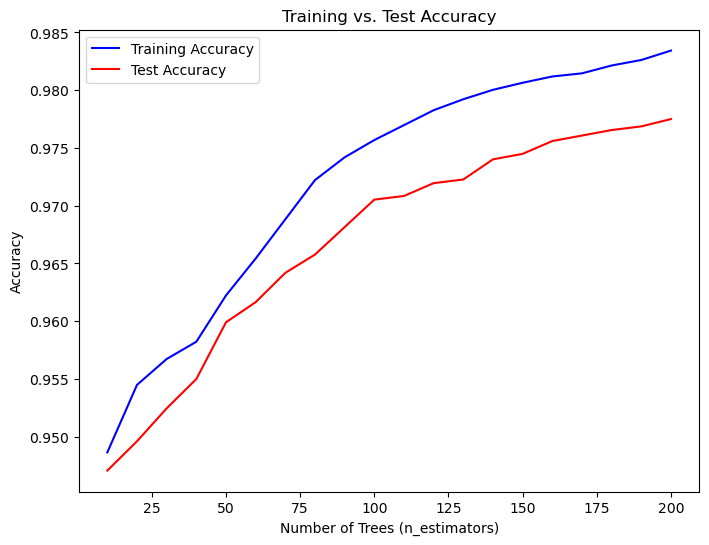

In [144]:
n_estimators_range = np.arange(10, 210, 10)

train_acc = []
test_acc = []

for n in n_estimators_range:
    gbm = GradientBoostingClassifier(n_estimators=n, learning_rate=0.05, max_depth=4, random_state=1)
    gbm.fit(X_train, y_train)
    
    train_acc.append(accuracy_score(y_train, gbm.predict(X_train)))  # تدريب
    test_acc.append(accuracy_score(y_test, gbm.predict(X_test)))  # اختبار


plt.figure(figsize=(8, 6))
plt.plot(n_estimators_range, train_acc, label="Training Accuracy", color='blue')
plt.plot(n_estimators_range, test_acc, label="Test Accuracy", color='red')
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.title("Training vs. Test Accuracy")
plt.legend()
plt.show()


In [146]:
# importance = gbm.feature_importances_
# features = X_train.columns


# indices = np.argsort(importance)[::-1]


# plt.figure(figsize=(10, 6))
# plt.title("Feature Importance - Gradient Boosting")
# plt.bar(range(len(features)), importance[indices], align="center")
# plt.xticks(range(len(features)), features[indices], rotation=90)
# plt.xlabel("Features")
# plt.ylabel("Importance Score")
# plt.show()


In [ ]:
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# from imblearn.over_sampling import SMOTE
# import pandas as pd

# # تقسيم البيانات
# X = df.drop('diabetes', axis=1)
# y = df['diabetes']

# # تقسيم البيانات إلى تدريب واختبار
# Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.30, random_state=1)

# # تطبيق SMOTE لزيادة بيانات الفئة الأقل
# smote = SMOTE(random_state=1)
# Xtrain_res, Ytrain_res = smote.fit_resample(Xtrain, Ytrain)

# # 1️⃣ نموذج Gradient Boosting مع تحسين المعلمات
# gbm = GradientBoostingClassifier(random_state=1)

# # تحديد معلمات الشبكة لتحسينها باستخدام GridSearchCV
# param_grid = {
#     'n_estimators': [50, 100, 150],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 5, 7]
# }

# grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
# grid_search.fit(Xtrain_res, Ytrain_res)

# # أفضل معلمات
# best_params = grid_search.best_params_
# print("أفضل معلمات Gradient Boosting:", best_params)

# # تدريب النموذج باستخدام أفضل المعلمات
# best_gbm = grid_search.best_estimator_
# best_gbm.fit(Xtrain_res, Ytrain_res)

# # التنبؤ على بيانات الاختبار
# gbm_predict = best_gbm.predict(Xtest)

# # حساب الدقة والمقاييس الأخرى
# gbm_test_acc = accuracy_score(Ytest, gbm_predict)
# gbm_precision = precision_score(Ytest, gbm_predict)
# gbm_recall = recall_score(Ytest, gbm_predict)
# gbm_f1 = f1_score(Ytest, gbm_predict)
# conf_matrix = confusion_matrix(Ytest, gbm_predict)

# # طباعة النتائج
# print("Gradient Boosting Test Accuracy:", gbm_test_acc)
# print("Precision:", gbm_precision)
# print("Recall:", gbm_recall)
# print("F1-Score:", gbm_f1)
# print("Confusion Matrix:\n", conf_matrix)
# print("Classification Report:\n", classification_report(y_test, y_pred))


In [147]:
model = SVC()  

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("SVM Training Accuracy:", train_accuracy)
print("SVM Test Accuracy:", test_accuracy)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))
accuracy = accuracy_score(y_test, y_pred)
accuracy

SVM Training Accuracy: 0.9770997553683066
SVM Test Accuracy: 0.9741597970830691

Confusion Matrix:
 [[3242   98]
 [  65 2903]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      3340
           1       0.97      0.98      0.97      2968

    accuracy                           0.97      6308
   macro avg       0.97      0.97      0.97      6308
weighted avg       0.97      0.97      0.97      6308



0.9684527584020292

In [148]:
# #stop here
# train_sizes = np.linspace(0.1, 1.0, 10)  
# train_acc = []
# test_acc = []


# for size in train_sizes:
#     X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=size, random_state=42)
    
#     model = SVC()
#     model.fit(X_train_subset, y_train_subset)

#     train_acc.append(accuracy_score(y_train_subset, model.predict(X_train_subset)))
#     test_acc.append(accuracy_score(y_test, model.predict(X_test)))


# plt.figure(figsize=(8, 6))
# plt.plot(train_sizes, train_acc, label='Training Accuracy', color='blue')
# plt.plot(train_sizes, test_acc, label='Test Accuracy', color='red')
# plt.xlabel('Training Size')
# plt.ylabel('Accuracy')
# plt.title('Overfitting Analysis for SVM')
# plt.legend()
# plt.grid(True)
# plt.show()

In [ ]:
# from sklearn.svm import SVC
# from sklearn.model_selection import RandomizedSearchCV
# from imblearn.over_sampling import SMOTE
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import accuracy_score

# # تقسيم البيانات
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# # توحيد البيانات باستخدام StandardScaler
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # تطبيق SMOTE لموازنة البيانات
# smote = SMOTE(random_state=42)
# X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# # تحسين المعلمات باستخدام RandomizedSearchCV لتقليل الوقت
# param_dist = {
#     'C': [0.1, 1, 10],
#     'kernel': ['linear', 'rbf'],
#     'gamma': ['scale', 'auto']
# }

# random_search = RandomizedSearchCV(SVC(), param_distributions=param_dist, n_iter=5, cv=3, n_jobs=-1, verbose=1)
# random_search.fit(X_train_res, y_train_res)

# # أفضل معلمات
# best_params = random_search.best_params_
# print(f"أفضل معلمات SVM: {best_params}")

# # تدريب النموذج باستخدام أفضل المعلمات
# best_svm = random_search.best_estimator_
# best_svm.fit(X_train_res, y_train_res)

# # التنبؤ على بيانات الاختبار
# y_pred = best_svm.predict(X_test_scaled)

# # حساب الدقة
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Test Accuracy: {accuracy:.4f}")


In [ ]:
# from sklearn.svm import SVC
# from imblearn.over_sampling import SMOTE
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import train_test_split

# # تقسيم البيانات
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# # توحيد البيانات باستخدام StandardScaler
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # تطبيق SMOTE لموازنة البيانات
# smote = SMOTE(random_state=42)
# X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# # إنشاء نموذج SVM مباشرة
# svm_model = SVC(kernel='rbf', C=1, gamma='scale')  # اختيارات معقولة بدون تحسين معلمات

# # تدريب النموذج
# svm_model.fit(X_train_res, y_train_res)

# # التنبؤ على بيانات الاختبار
# y_pred = svm_model.predict(X_test_scaled)

# # حساب الدقة
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Test Accuracy: {accuracy:.4f}")


In [153]:
# from sklearn.naive_bayes import GaussianNB
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, confusion_matrix

# # تقسيم البيانات
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# # إنشاء نموذج Naive Bayes
# nb_model = GaussianNB()

# # تدريب النموذج
# nb_model.fit(X_train, y_train)

# # التنبؤ
# y_pred = nb_model.predict(X_test)

# # حساب الدقة
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Naive Bayes Test Accuracy: {accuracy:.4f}")

# # طباعة مصفوفة التشويش
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


In [152]:
# from sklearn.neural_network import MLPClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, confusion_matrix

# # تقسيم البيانات
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# # إنشاء نموذج MLP (Multi-layer Perceptron)
# mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# # تدريب النموذج
# mlp_model.fit(X_train, y_train)

# # التنبؤ
# y_pred = mlp_model.predict(X_test)

# # حساب الدقة
# accuracy = accuracy_score(y_test, y_pred)
# print(f"MLPClassifier Test Accuracy: {accuracy:.4f}")

# # طباعة مصفوفة التشويش
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


In [151]:
# from sklearn.neural_network import MLPClassifier
# from sklearn.model_selection import RandomizedSearchCV
# from imblearn.over_sampling import SMOTE
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import accuracy_score
# import numpy as np

# # تقسيم البيانات
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# # توحيد البيانات باستخدام StandardScaler
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # تطبيق SMOTE لموازنة البيانات
# smote = SMOTE(random_state=42)
# X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# # معلمات بسيطة لـ RandomizedSearchCV
# param_dist = {
#     'hidden_layer_sizes': [(50,), (100,)],  # تقليل الخيارات
#     'activation': ['relu'],  # استخدم تنشيط واحد
#     'solver': ['adam'],  # استخدم خوارزمية واحدة
#     'learning_rate': ['constant'],  # استخدم خيار واحد
#     'max_iter': [1000],  # استخدم عدد التكرارات الثابت
#     'alpha': [0.0001]  # تقليل المعامل المنتظم
# }

# # ضبط المعلمات عشوائيًا
# random_search = RandomizedSearchCV(MLPClassifier(), param_distributions=param_dist, n_iter=3, cv=3, n_jobs=-1, verbose=1, random_state=42)
# random_search.fit(X_train_res, y_train_res)

# # أفضل معلمات
# best_params = random_search.best_params_
# print(f"أفضل معلمات MLPClassifier: {best_params}")

# # تدريب النموذج باستخدام أفضل المعلمات
# best_mlp = random_search.best_estimator_
# best_mlp.fit(X_train_res, y_train_res)

# # التنبؤ على بيانات الاختبار
# y_pred = best_mlp.predict(X_test_scaled)

# # حساب الدقة
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Test Accuracy: {accuracy:.4f}")


In [154]:
# from imblearn.over_sampling import SMOTE
# from sklearn.model_selection import train_test_split
# from sklearn.neural_network import MLPClassifier
# from sklearn.metrics import accuracy_score, confusion_matrix

# # تقسيم البيانات
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# # تطبيق SMOTE لموازنة البيانات
# smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=5)
# X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# # إنشاء النموذج
# mlp = MLPClassifier(solver='adam', max_iter=500, learning_rate='constant', 
#                     hidden_layer_sizes=(50,), alpha=0.0001, activation='relu')

# # تدريب النموذج
# mlp.fit(X_train_res, y_train_res)

# # التنبؤ على بيانات الاختبار
# y_pred = mlp.predict(X_test)

# # حساب الدقة
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Test Accuracy: {accuracy:.4f}")
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


In [ ]:
# from catboost import CatBoostClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, confusion_matrix

# # تقسيم البيانات
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# # إنشاء نموذج CatBoost
# catboost_model = CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, random_state=42, verbose=0)

# # تدريب النموذج
# catboost_model.fit(X_train, y_train)

# # التنبؤ
# y_pred = catboost_model.predict(X_test)

# # حساب الدقة
# accuracy = accuracy_score(y_test, y_pred)
# print(f"CatBoost Test Accuracy: {accuracy:.4f}")

# # طباعة مصفوفة التشويش
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


In [156]:
# from catboost import CatBoostClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, confusion_matrix

# # تقسيم البيانات
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# # إنشاء نموذج CatBoost مع معلمات مختلفة
# model = CatBoostClassifier(iterations=1000, learning_rate=0.05, depth=10, cat_features=[], random_seed=42, verbose=200)

# # تدريب النموذج
# model.fit(X_train, y_train)

# # التنبؤ على بيانات الاختبار
# y_pred = model.predict(X_test)

# # حساب الدقة
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Test Accuracy: {accuracy:.4f}")
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


In [95]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# توحيد البيانات باستخدام StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# تطبيق SMOTE لموازنة البيانات
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# تحسين المعلمات باستخدام GridSearchCV
param_grid = {
    'iterations': [400,500],  # عدد التكرارات
    'depth': [5, 7],  # عمق الشجرة
    'learning_rate': [0.05, 0.1],  # معدل التعلم
}

grid_search = GridSearchCV(CatBoostClassifier(silent=True), param_grid, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train_res, y_train_res)

# أفضل معلمات
best_params = grid_search.best_params_
print(f"أفضل معلمات CatBoost: {best_params}")

# تدريب النموذج باستخدام أفضل المعلمات
best_catboost = grid_search.best_estimator_
best_catboost.fit(X_train_res, y_train_res)

# التنبؤ على بيانات الاختبار
y_pred = best_catboost.predict(X_test_scaled)

# حساب الدقة
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")


Fitting 3 folds for each of 8 candidates, totalling 24 fits
أفضل معلمات CatBoost: {'depth': 5, 'iterations': 400, 'learning_rate': 0.05}
Test Accuracy: 0.7252


In [93]:
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# توحيد البيانات
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# تطبيق SMOTE لموازنة البيانات
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# تعريف نماذج التصنيف
catboost_model = CatBoostClassifier(iterations=100, depth=7, learning_rate=0.05, verbose=0)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# دمج النماذج في VotingClassifier
voting_clf = VotingClassifier(estimators=[('catboost', catboost_model), ('rf', rf_model)], voting='soft')

# تدريب النموذج المدمج
voting_clf.fit(X_train_res, y_train_res)

# التنبؤ على بيانات الاختبار
y_pred = voting_clf.predict(X_test_scaled)

# حساب الدقة
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 0.7226


In [157]:
# from sklearn.neural_network import MLPClassifier
# from sklearn.model_selection import GridSearchCV
# from imblearn.over_sampling import SMOTE
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import accuracy_score

# # تقسيم البيانات
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# # توحيد البيانات باستخدام StandardScaler
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # تطبيق SMOTE لموازنة البيانات
# smote = SMOTE(random_state=42)
# X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# # تحسين المعلمات باستخدام GridSearchCV
# param_grid = {
#     'hidden_layer_sizes': [(50,), (100,)],  # تقليل الخيارات
#     'max_iter': [200, 300],  # تقليل عدد التكرارات
#     'learning_rate': ['constant'],  # استخدام خيار واحد فقط
#     'alpha': [0.0001, 0.001],  # تقليل النطاق
#     'solver': ['adam'],
#     'activation': ['relu']
# }

# grid_search = GridSearchCV(MLPClassifier(), param_grid, cv=3, n_jobs=-1, verbose=1)
# grid_search.fit(X_train_res, y_train_res)

# # أفضل معلمات
# best_params = grid_search.best_params_
# print(f"أفضل معلمات MLPClassifier: {best_params}")

# # تدريب النموذج باستخدام أفضل المعلمات
# best_mlp = grid_search.best_estimator_
# best_mlp.fit(X_train_res, y_train_res)

# # التنبؤ على بيانات الاختبار
# y_pred = best_mlp.predict(X_test_scaled)

# # حساب الدقة
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Test Accuracy: {accuracy:.4f}")
